# Stage 2: Airbnb Amsterdam  - EDA (Explanatory Data Analysis)

by Orit Ophir

In [1]:
import numpy as np
import os 
import pandas as pd
from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import ensemble, tree, linear_model
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr
import pyodbc
import seaborn as sns
sns.set()
plt.style.use('seaborn')
import re
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ks_2samp
from scipy.stats import norm
import missingno as msno
import warnings
import datetime
warnings.filterwarnings("ignore")
import nltk
#nltk.download('popular')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ophir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ophir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Uploading data file:

In [190]:
df = pd.read_csv('amsterdam_final_data.csv')
df.head()

,Unnamed: 0,id,host_id,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,...,_'jumio',_'facebook',_'offline_government_id',_'government_id',_'selfie',_'identity_manual',_'work_email',_'google','phone',_'manual_offline'
0,0,5957043,30922450,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,1,12279014,66160250,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,...,1,1,0,0,0,0,0,0,0,0
2,2,13824148,79317608,Netherlands,within a few hours,100.0,1.0,NaN,1.0,1.0,...,1,1,0,0,0,0,0,0,0,0
3,3,15350277,18571882,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,...,1,1,1,1,0,0,0,0,0,0
4,4,15885709,28689390,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [191]:
#common error uppon dataset upload
del  df['Unnamed: 0']

Columns information:

# Outliers

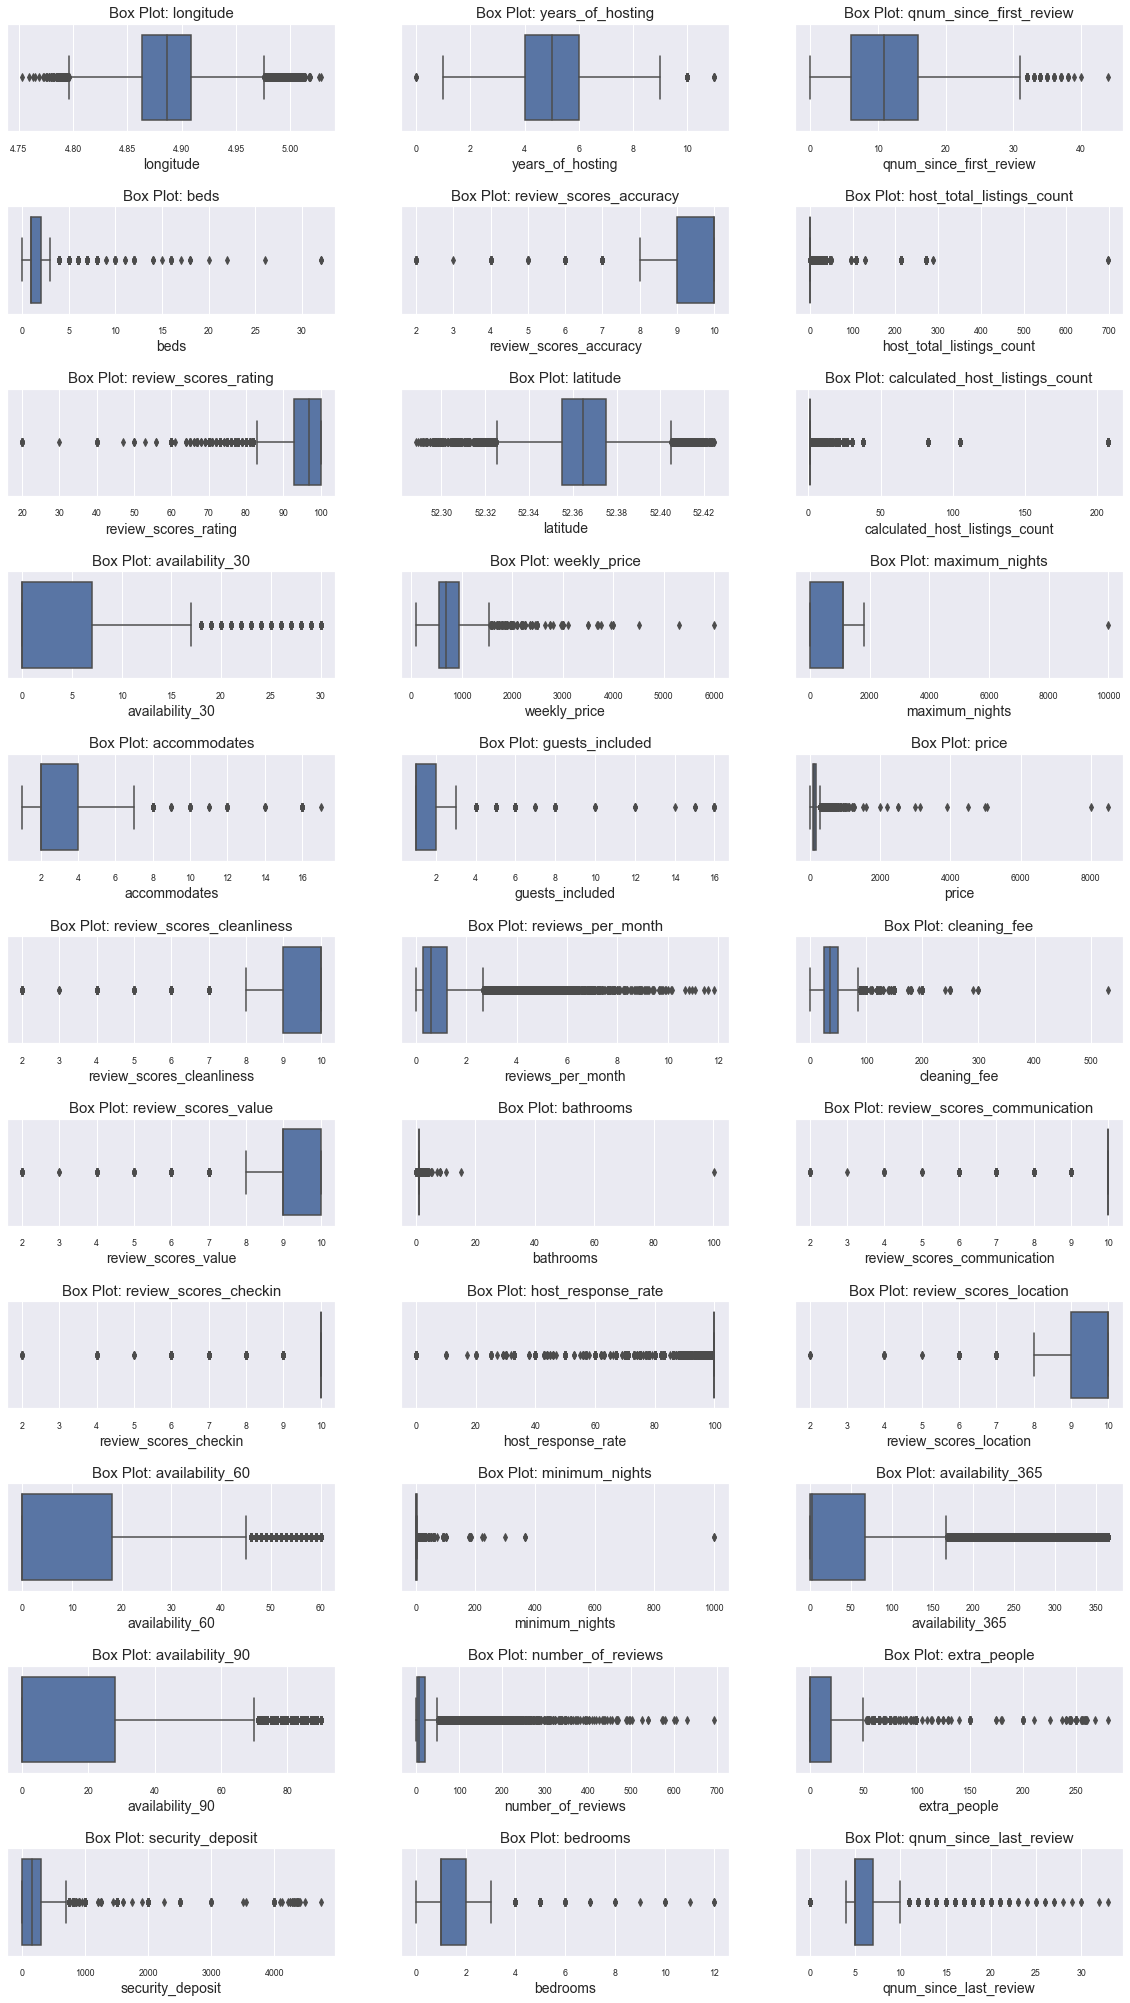

In [129]:
plt.figure(figsize=(20,200))

def outliers_boxplot(df):
    for i, col in enumerate(df.columns):
        if col != 'host_is_superhost':
            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=df, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)
        
outliers_boxplot(df_num_non_dummy)

Creating Nulls dataframe and matrix

In [202]:
df_nulls = df.copy()
for col in df_nulls:
    if df_nulls[col].isna().sum() == 0:
        del df_nulls[col]
df_nulls

,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,host_identity_verified,bathrooms,bedrooms,...,security_deposit,cleaning_fee,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,1.0,1.0,1.0,...,300.0,NaN,80.0,9.0,9.0,9.0,9.0,8.0,9.0,0.14
1,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,1.0,1.0,1.0,...,NaN,25.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.13
2,Netherlands,within a few hours,100.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,...,NaN,50.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.78
3,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,0.0,1.0,3.0,...,NaN,40.0,100.0,8.0,8.0,10.0,10.0,10.0,8.0,0.04
4,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,80.0,8.0,10.0,8.0,10.0,6.0,8.0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,NaN,within a few hours,100.0,0.0,Hoofddorppleinbuurt,1.0,1.0,0.0,1.0,3.0,...,500.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20026,NaN,within an hour,100.0,0.0,Frederik Hendrikbuurt,1.0,1.0,0.0,1.0,0.0,...,NaN,NaN,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.00
20027,NaN,NaN,NaN,0.0,NaN,1.0,1.0,0.0,1.0,1.0,...,0.0,30.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.80
20028,NaN,NaN,NaN,0.0,Oud-West,1.0,1.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

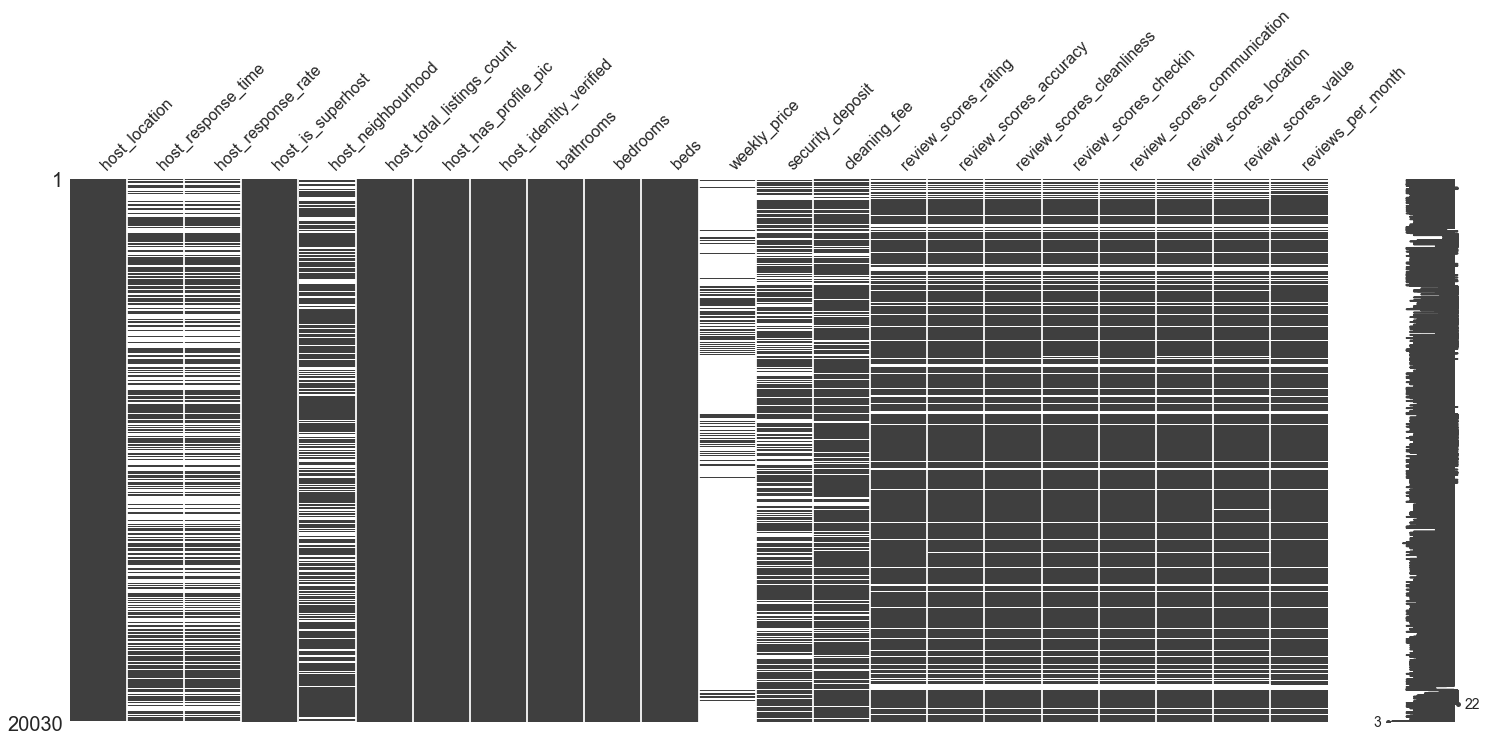

In [61]:
msno.matrix(df_nulls)

Table of numeric Nulls

In [91]:
#df_num_null = df_num_non_dummy.isna()
#df_num_null

Dataframe containing missing value counts and their frequency:

In [203]:
mis_val = df_nulls.isna().sum()
mis_val_per = df_nulls.isna().sum()/len(df_nulls)*100
mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,:] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

,Missing Values,% of Total Values
weekly_price,17187,85.8
host_response_rate,9483,47.3
host_response_time,9483,47.3
security_deposit,6166,30.8
host_neighbourhood,5808,29.0
cleaning_fee,3629,18.1
review_scores_checkin,2661,13.3
review_scores_location,2660,13.3
review_scores_value,2659,13.3
review_scores_communication,2652,13.2


Creating a dataframe with each of the missing values as 1, while non missing values are 0:

In [132]:
df_missing_data = (df.isna()).astype('int64')
df_missing_data.describe()

,id,host_id,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,_'jumio',_'facebook',_'offline_government_id',_'government_id',_'selfie',_'identity_manual',_'work_email',_'google','phone',_'manual_offline'
count,20030.0,20030.0,20030.000000,20030.000000,20030.000000,20030.00000,20030.000000,20030.00000,20030.00000,20030.00000,...,20030.0,20030.0,20030.0,20030.0,20030.0,20030.0,20030.0,20030.0,20030.0,20030.0
mean,0.0,0.0,0.001997,0.473440,0.473440,0.00020,0.289965,0.00020,0.00020,0.00020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.044644,0.499307,0.499307,0.01413,0.453757,0.01413,0.01413,0.01413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.000000,1.000000,1.000000,0.00000,1.000000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.00000,1.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Cleansing

<AxesSubplot:>

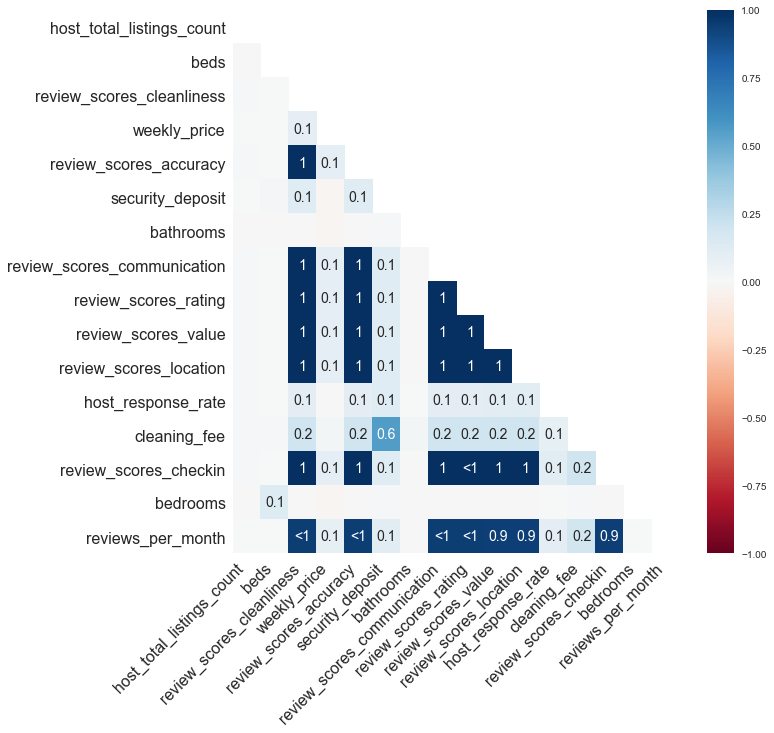

In [36]:
## missingness correlation heatmap
msno.heatmap(df_num_non_dummy,figsize=(10,10))

### outliers_df


The data is skewed and not normaly distributed, we'll use the IQR method to identify outliers to set up a boundary before Q1 and after Q3. Any values that fall outside of this boundary are considered outliers:

In [204]:
def outliers_df(df):
    total_outliers = pd.DataFrame(columns={'Outlier count','Percent'})
    for col in df:
        if col != 'host_is_superhost':
            temp = pd.DataFrame(df[col], columns={col})
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            upper_outliers = temp[temp[col] > upper_limit]
            lower_outliers = temp[temp[col] < lower_limit]
            temp = upper_outliers.append(lower_outliers)
            b = "{}".format(col)
            num = len(temp)
            total_outliers.loc[b] = [num, num/len(df)*100]
    return total_outliers[total_outliers['Percent']>0]
       
outliers_df = outliers_df(df_num_non_dummy).sort_values('Percent', ascending=False)
outliers_df

,Percent,Outlier count
minimum_nights,6961.0,34.752871
qnum_since_last_review,6604.0,32.970544
host_total_listings_count,4901.0,24.468298
qnum_since_first_review,4200.0,20.968547
calculated_host_listings_count,4200.0,20.968547
availability_90,4042.0,20.179730
availability_365,3980.0,19.870195
beds,3910.0,19.520719
availability_30,3841.0,19.176236
availability_60,3840.0,19.171243


In [95]:
outliers_df.to_csv('outliers_df.csv')

### new_outliers_df

Labeling every outlier with 'Outlier' in order to seperate the outliers from nulls (temporarily, and then to 0/1):

In [205]:
def outliers(df):
    label_out_df = df.copy()
    for col in label_out_df:
        if col in outliers_df.index:
            Q1 = label_out_df[col].quantile(0.25)
            Q3 = label_out_df[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            label_out_df[col] = np.where(label_out_df[col] > upper_limit,'Outlier',np.where(label_out_df[col] < lower_limit,'Outlier',label_out_df[col]))
    return label_out_df
new_df_outliers = outliers(df)
new_df_outliers.head(10)

,id,host_id,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,_'jumio',_'facebook',_'offline_government_id',_'government_id',_'selfie',_'identity_manual',_'work_email',_'google','phone',_'manual_offline'
0,5957043,30922450,Netherlands,NaN,nan,0.0,NaN,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,12279014,66160250,Netherlands,NaN,nan,0.0,NaN,1.0,1.0,1.0,...,1,1,0,0,0,0,0,0,0,0
2,13824148,79317608,Netherlands,within a few hours,100.0,1.0,NaN,1.0,1.0,1.0,...,1,1,0,0,0,0,0,0,0,0
3,15350277,18571882,Netherlands,NaN,nan,0.0,NaN,1.0,1.0,0.0,...,1,1,1,1,0,0,0,0,0,0
4,15885709,28689390,Netherlands,NaN,nan,0.0,NaN,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
5,15970340,96074261,Netherlands,NaN,nan,0.0,NaN,Outlier,1.0,0.0,...,0,1,0,0,0,0,0,0,0,0
6,16154724,96074261,Netherlands,NaN,nan,0.0,NaN,Outlier,1.0,0.0,...,0,1,0,0,0,0,0,0,0,0
7,16656477,17112458,Netherlands,NaN,nan,0.0,NaN,1.0,1.0,0.0,...,1,0,1,1,1,1,1,0,0,0
8,17245595,24161957,Netherlands,NaN,nan,0.0,NaN,1.0,1.0,0.0,...,1,1,1,1,1,1,0,1,0,0
9,17741047,23550735,Netherlands,NaN,nan,0.0,Zeeburg,1.0,1.0,1.0,...,1,1,0,0,0,0,1,0,0,0


### df_outliers

Creating a dataframe with outliers as 1 and non-outliers as 0:

In [223]:
df_outliers = new_df_outliers.isin(['Outlier']) 
df_outliers = df_outliers.astype('int')
df_outliers

,id,host_id,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,_'jumio',_'facebook',_'offline_government_id',_'government_id',_'selfie',_'identity_manual',_'work_email',_'google','phone',_'manual_offline'
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that we have a dataframe saving all the outliers we'll convert all the outliers to nulls, just so I can see differences in distribution with and without outliers and then decide which of the outliers to remove or not:

In [207]:
def capping(df):
    temp = df.copy()
    for col in temp:
        if col in outliers_df.index:
            Q1 = temp[col].quantile(0.25)
            Q3 = temp[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            temp[col] = np.where(temp[col] > upper_limit,np.nan,np.where(temp[col] < lower_limit,np.nan,temp[col]))
    return temp
temp = capping(df)
temp

,id,host_id,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,_'jumio',_'facebook',_'offline_government_id',_'government_id',_'selfie',_'identity_manual',_'work_email',_'google','phone',_'manual_offline'
0,5957043,30922450,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,12279014,66160250,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,1.0,...,1,1,0,0,0,0,0,0,0,0
2,13824148,79317608,Netherlands,within a few hours,100.0,1.0,NaN,1.0,1.0,1.0,...,1,1,0,0,0,0,0,0,0,0
3,15350277,18571882,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,0.0,...,1,1,1,1,0,0,0,0,0,0
4,15885709,28689390,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,28830788,60865851,NaN,within a few hours,100.0,0.0,Hoofddorppleinbuurt,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
20026,29230120,94786135,NaN,within an hour,100.0,0.0,Frederik Hendrikbuurt,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
20027,29275952,66608213,NaN,NaN,NaN,0.0,NaN,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
20028,30166752,74976114,NaN,NaN,NaN,0.0,Oud-West,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Saving the inter quartal outliers dataframe for future reference.

In [101]:
temp.to_csv('outliers_q_df.csv')

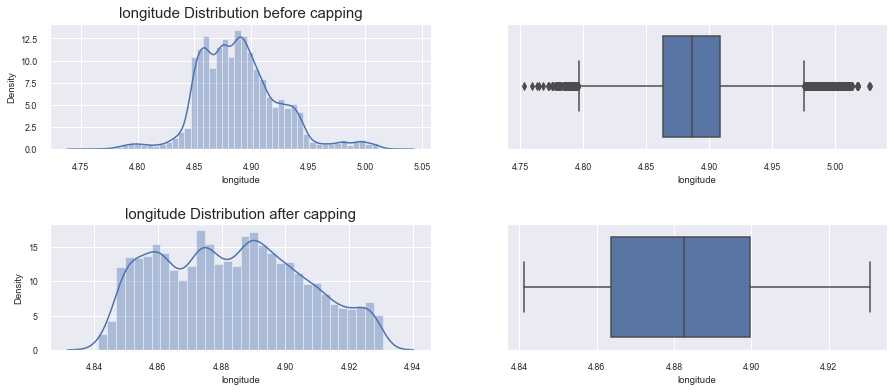

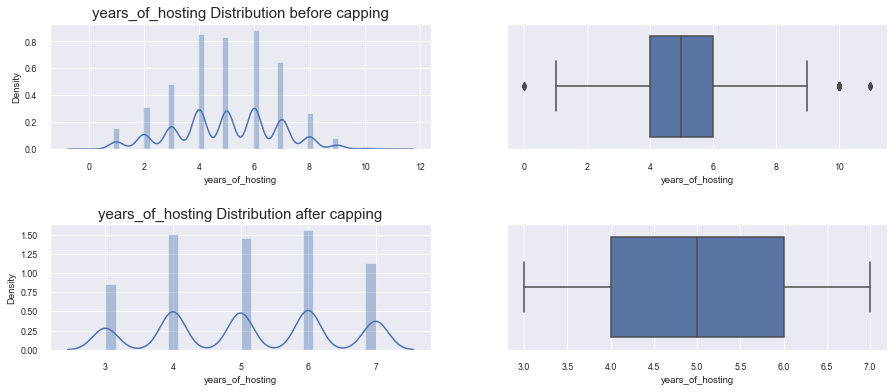

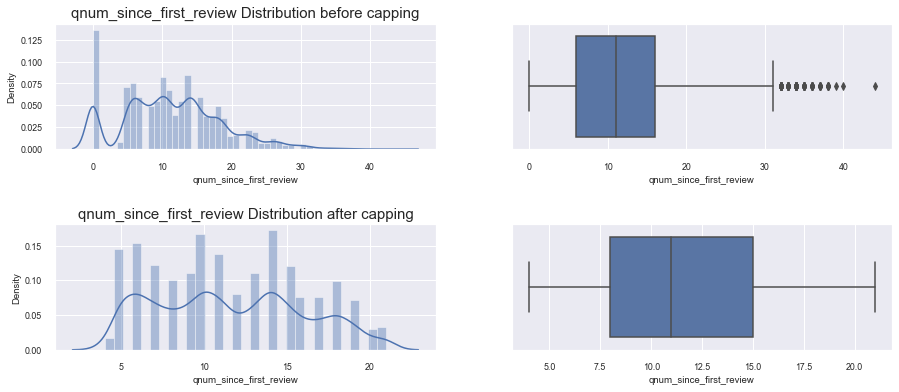

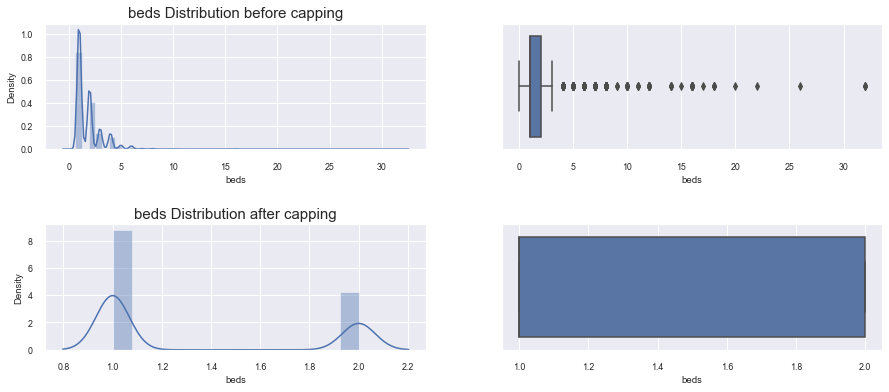

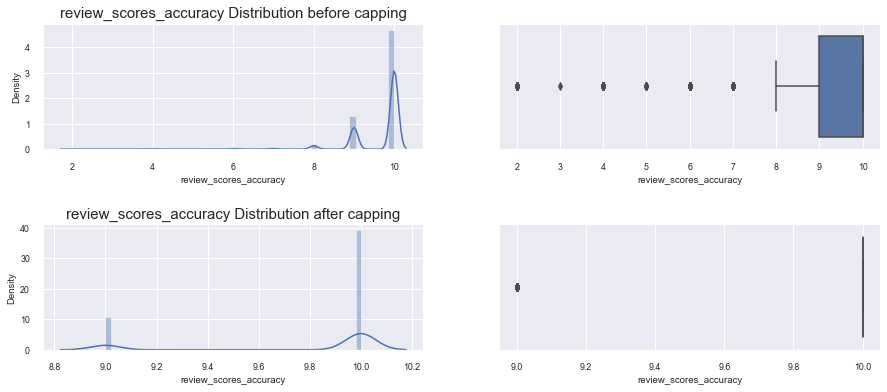

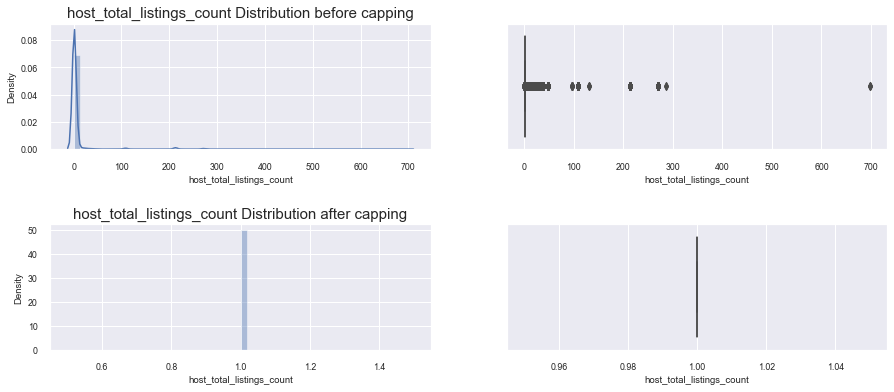

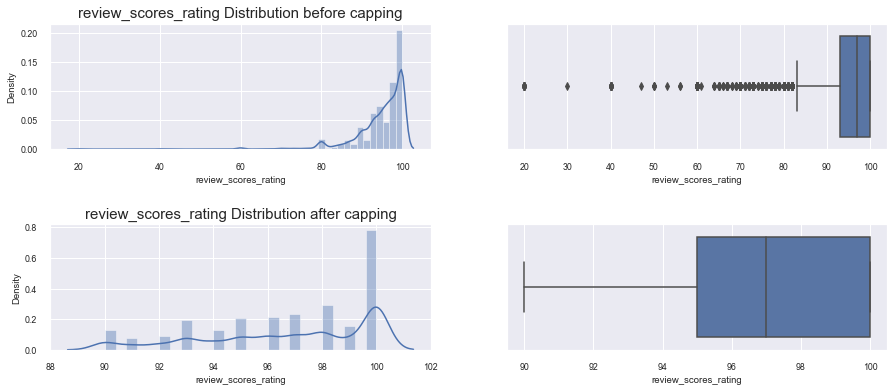

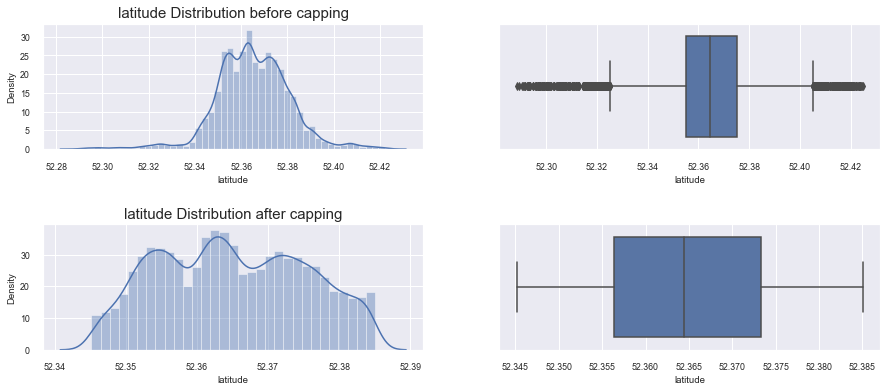

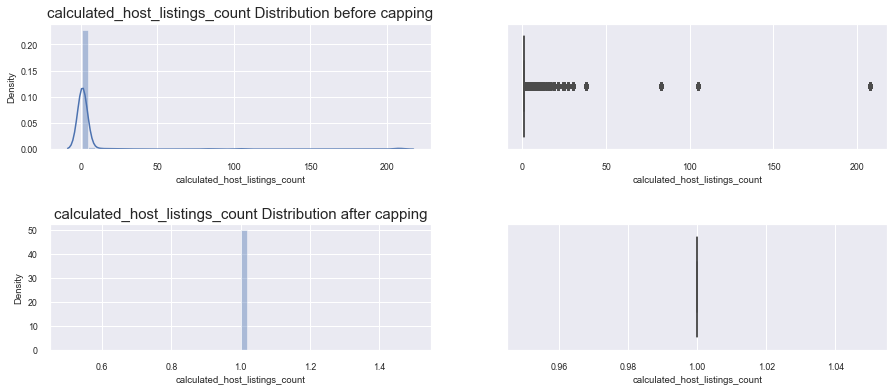

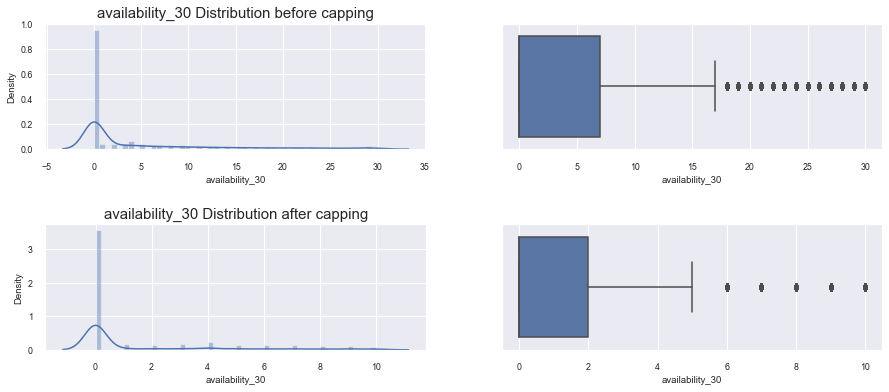

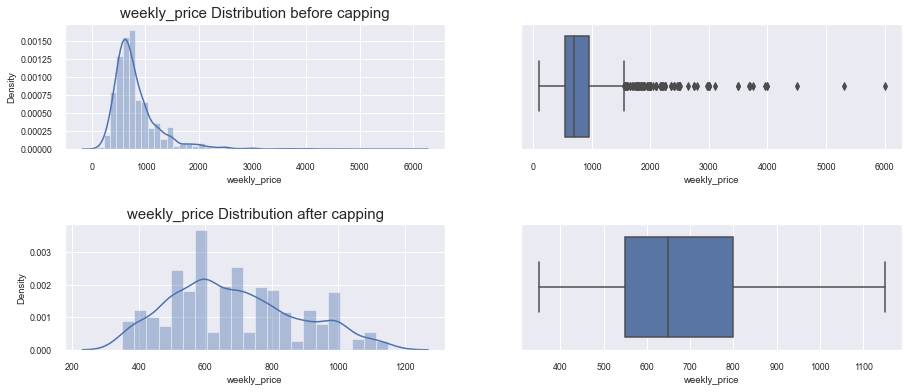

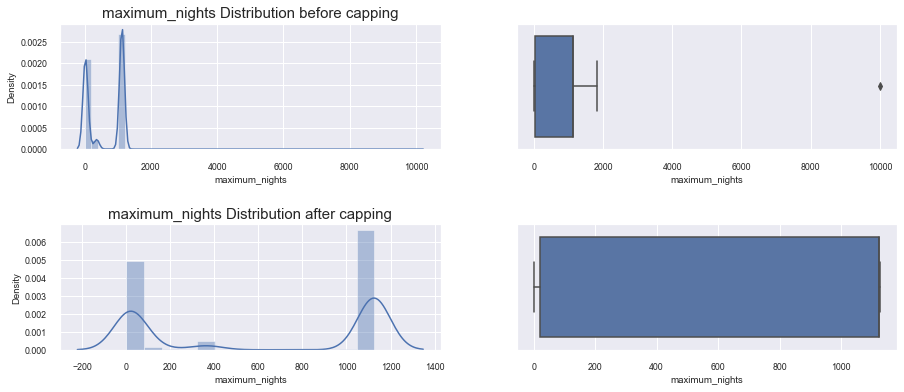

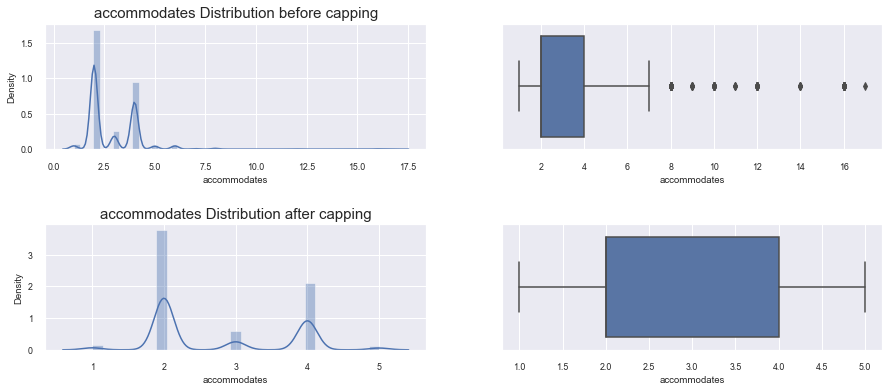

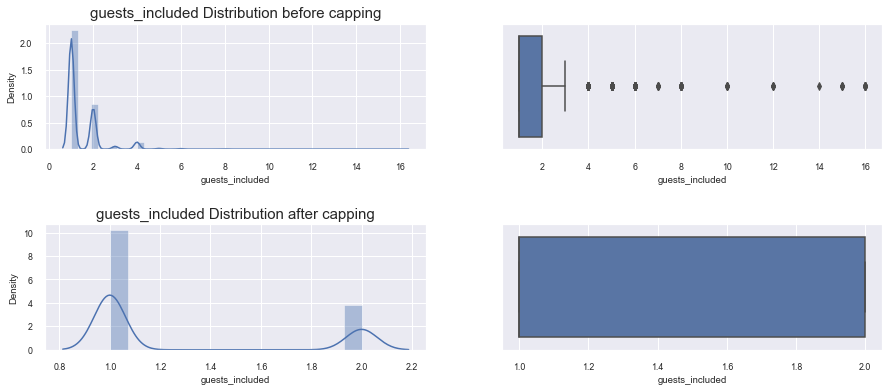

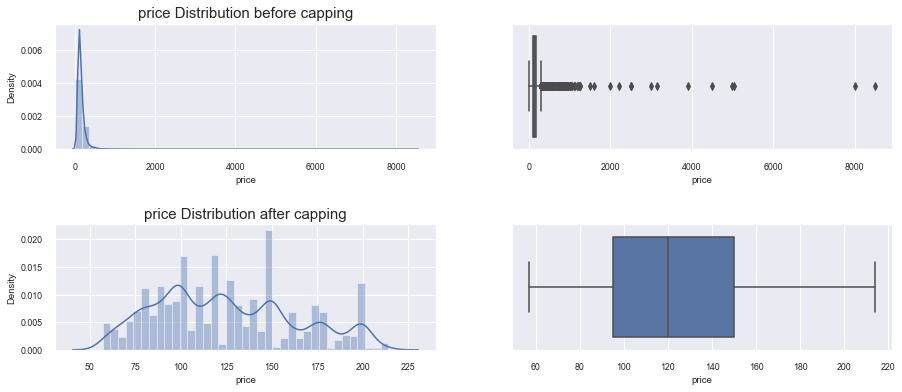

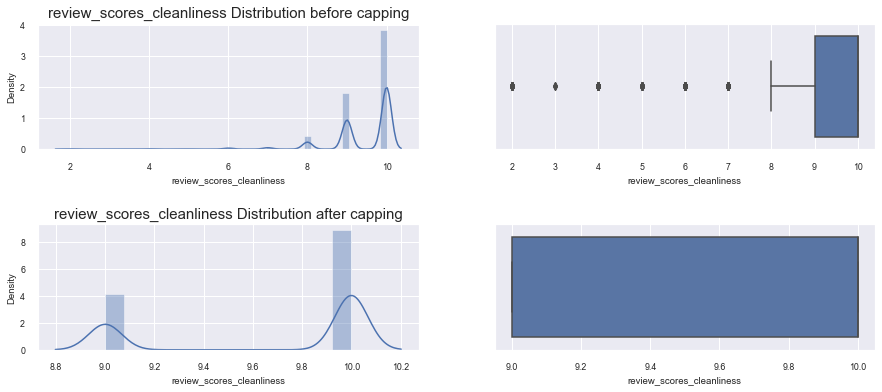

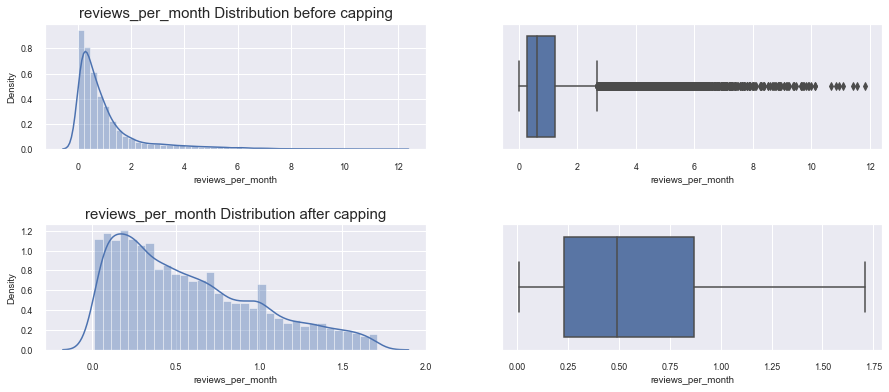

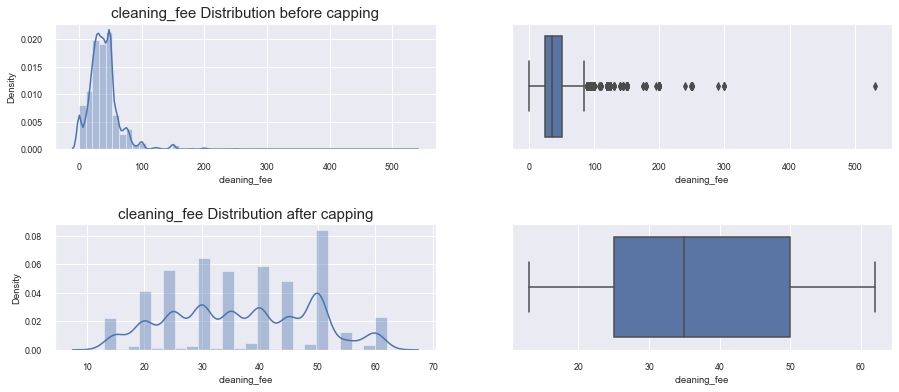

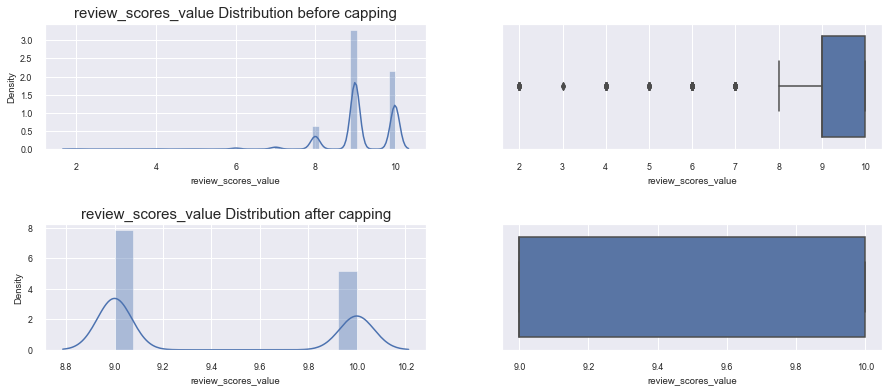

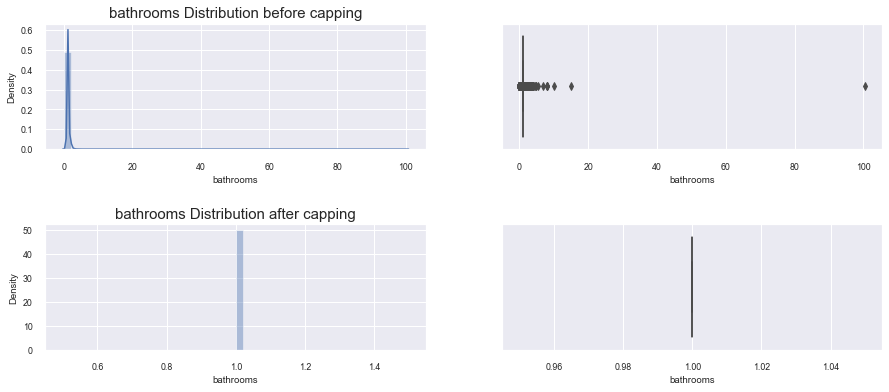

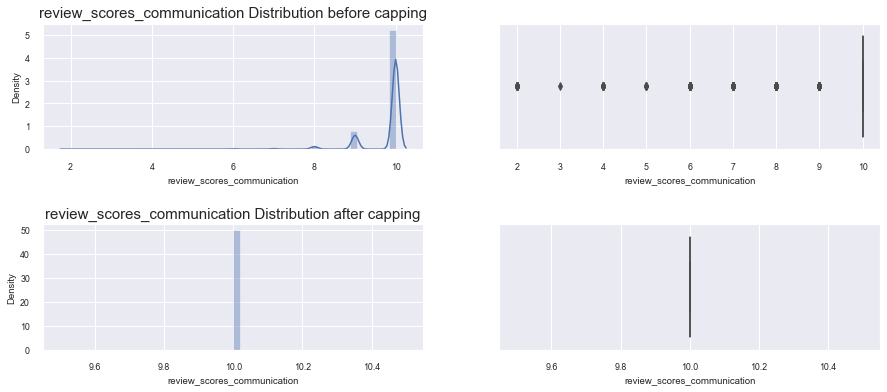

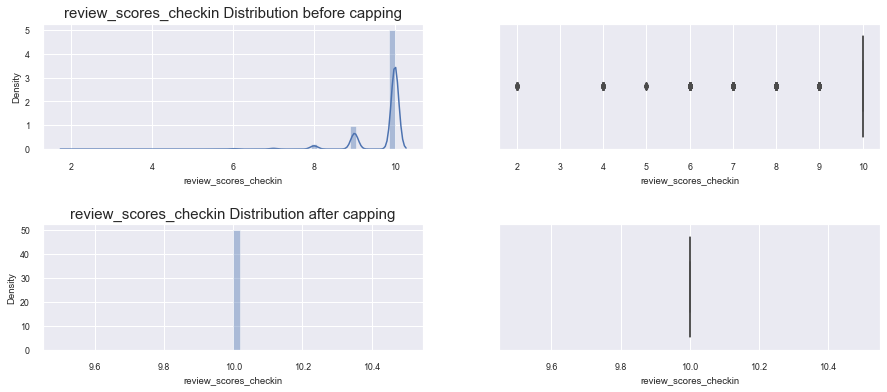

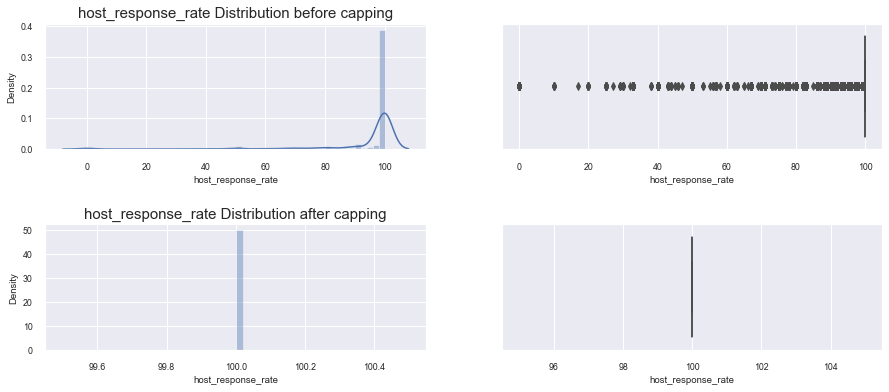

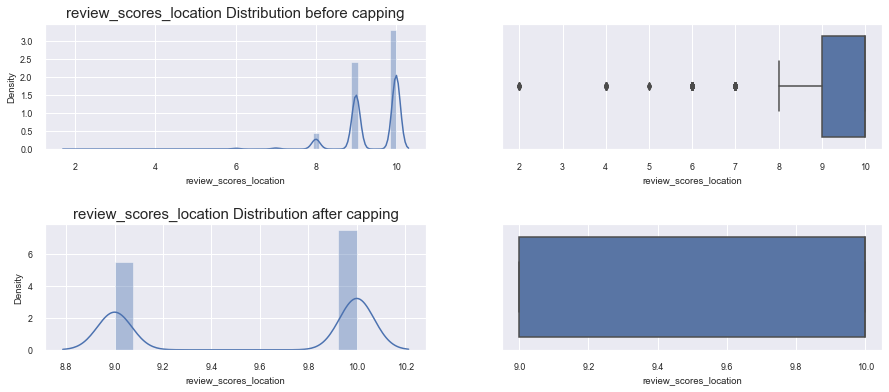

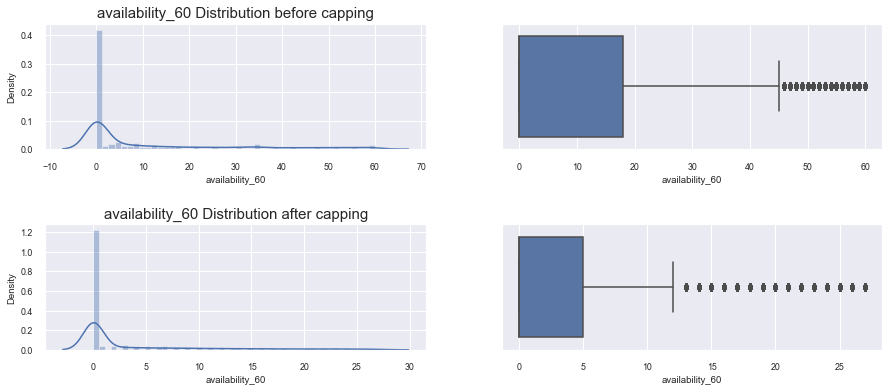

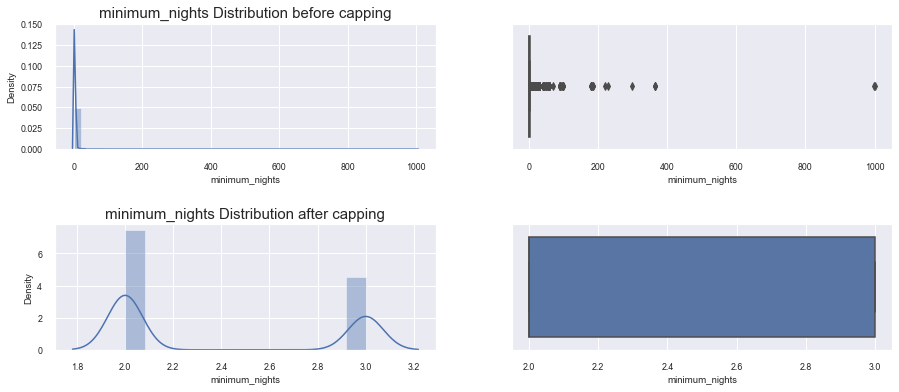

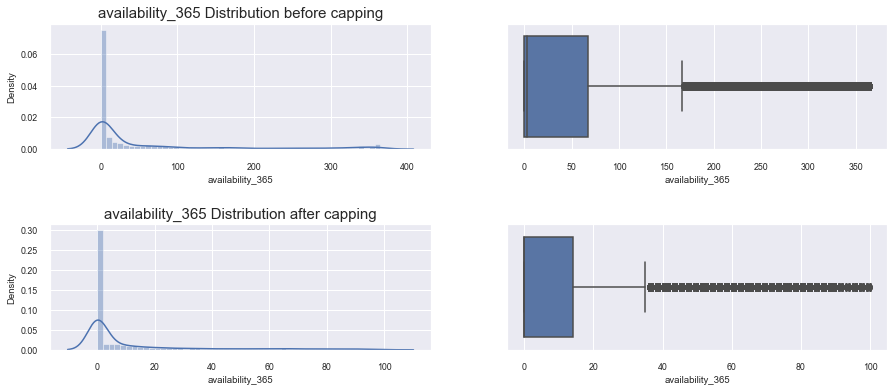

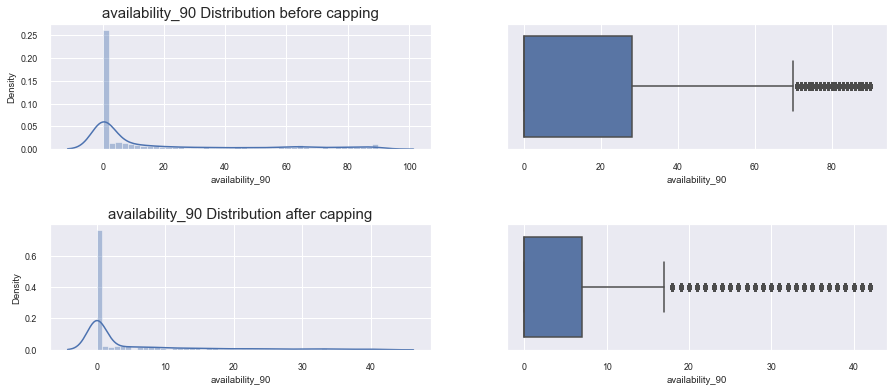

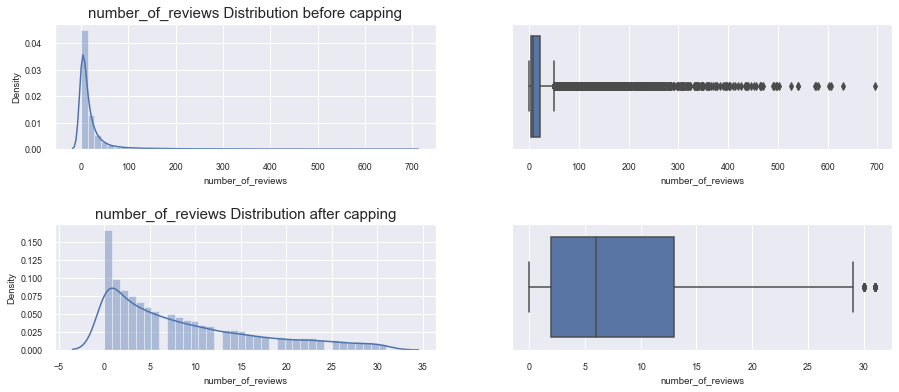

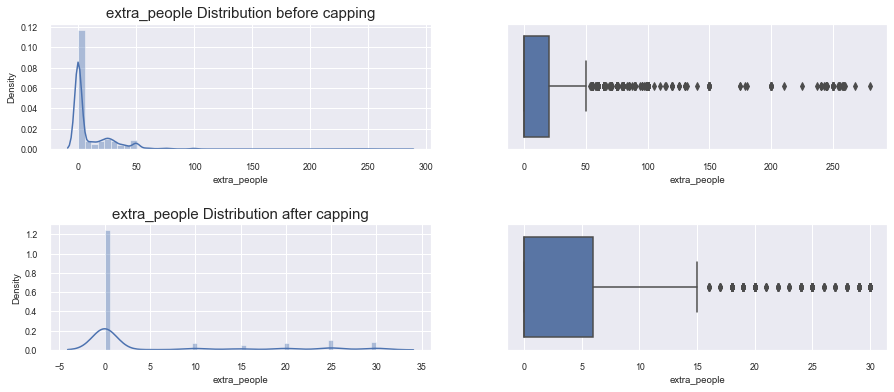

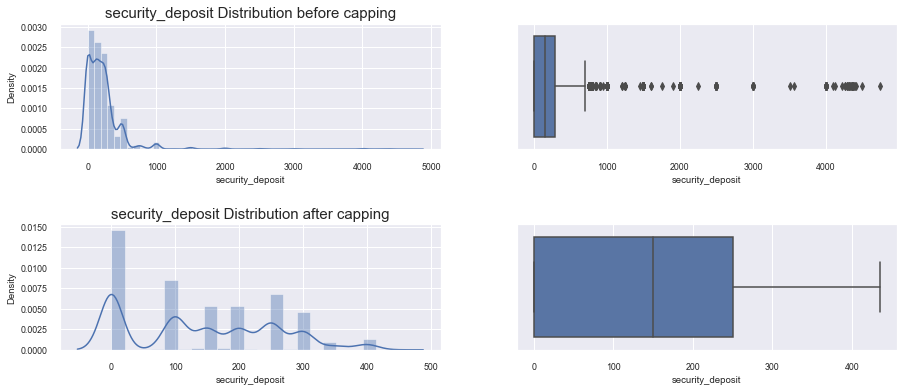

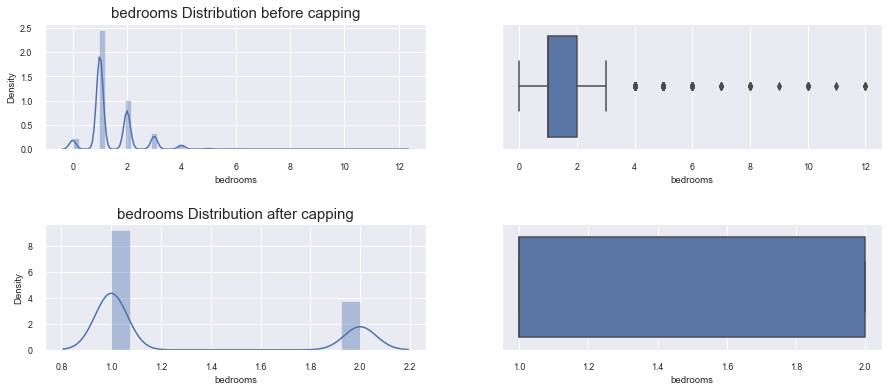

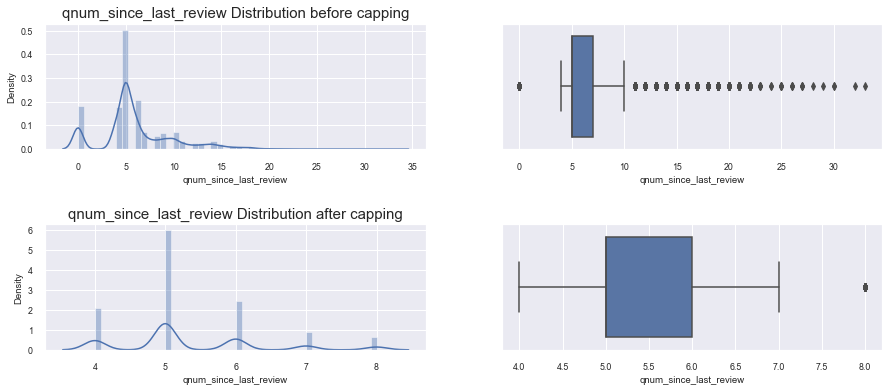

In [142]:
def dist_outliers(original_df, new, cols):
    for col in df_num_non_dummy:
        if col in cols:
            plt.figure(figsize=(15,6))
            plt.subplot(2,2,1)
            sns.distplot(original_df[col])
            plt.title('{} Distribution before capping'.format(col), fontsize=15)
            plt.subplot(2,2,2)
            sns.boxplot(original_df[col])
            plt.subplots_adjust(hspace = 0.6)
            plt.subplot(2,2,3)
            sns.distplot(new[col])
            plt.title('{} Distribution after capping'.format(col), fontsize=15)
            plt.subplot(2,2,4)
            sns.boxplot(new[col])
            plt.show()
dist_outliers(df, temp, outliers_df.index)

We clearly need to filter some features that either the feature distribution has changed significantly, or cases where removing outliers results with only one value.

Checking if distribution (Kolmogorov–Smirnov) and/or correlation has changed significantly:

In [208]:
### differences between two correlation in Python: https://github.com/psinger/CorrelationStats
### We will only take from the code the Fisher method for two-tailed test
def cocor(x1,y1, x2,y2):
    xy1 = x1.corr(y1, method='spearman')
    xy2 = x2.corr(y2, method='spearman')
    n1 = len(x1)
    n2 = len(x2)
    xy_z = 0.5 * np.log((1 + xy1)/(1 - xy1))
    ab_z = 0.5 * np.log((1 + xy2)/(1 - xy2))
    if n2 is None:
        n2 = n1
    se_diff_r = np.sqrt(1/(n1 - 3) + 1/(n2 - 3))
    diff = xy_z - ab_z
    z = abs(diff / se_diff_r)
    p = (1 - norm.cdf(z)) * 2
    return z, p

In [209]:
c=df_num_non_dummy
names=c.columns
#Creating df that reflects the correlation change
out_df= pd.DataFrame(columns=['feature','outliers_cnt','distribution_changed','correlation_changed'])

#A copy of numeric df
no_outliers=df_num_non_dummy.copy()
np.seterr(divide='ignore', invalid='ignore')
for i in names:
#   print(i)
#     df with outliers
    out=df[i]
#     df with out outliers
    non=df[i].loc[df_outliers[i]==0]
#     lable with outliers
    superhost_out=df['host_is_superhost']
#     lable with out outliers
    superhost_non=df['host_is_superhost'].loc[df_outliers[i]==0]
#     cocor pvalue
    p, pvalue = cocor(out,superhost_out, non,superhost_non)
    cor_change=np.where(pvalue<0.05,'+','-')
#     outliers count
    mv=df_outliers.sum()
#    ks pvalue
    pval=ks_2samp(out, non)[1]
    dist_change=np.where(pval<0.05,'+','-')
    out_df=out_df.append({'feature':i,'outliers_cnt':mv,'distribution_changed':dist_change,'correlation_changed': cor_change},ignore_index=True)
out_df.head(10)

,feature,outliers_cnt,distribution_changed,correlation_changed
0,longitude,id 0 host_id ...,+,-
1,years_of_hosting,id 0 host_id ...,+,-
2,qnum_since_first_review,id 0 host_id ...,+,+
3,beds,id 0 host_id ...,+,+
4,review_scores_accuracy,id 0 host_id ...,+,+
5,host_total_listings_count,id 0 host_id ...,+,-
6,review_scores_rating,id 0 host_id ...,+,+
7,latitude,id 0 host_id ...,+,-
8,calculated_host_listings_count,id 0 host_id ...,+,-
9,availability_30,id 0 host_id ...,+,+


In [210]:
#All 'Yes' Vars in the 'Drop'colums shall be deleted, since the infect correlation and distribution. 
#We don't want to delete vars that will change the distribution
out_df['drop']='yes'
out_df.loc[(out_df.distribution_changed=='+')& (out_df.correlation_changed=='+'),'drop'] = 'no'
out_df

,feature,outliers_cnt,distribution_changed,correlation_changed,drop
0,longitude,id 0 host_id ...,+,-,yes
1,years_of_hosting,id 0 host_id ...,+,-,yes
2,qnum_since_first_review,id 0 host_id ...,+,+,no
3,beds,id 0 host_id ...,+,+,no
4,review_scores_accuracy,id 0 host_id ...,+,+,no
5,host_total_listings_count,id 0 host_id ...,+,-,yes
6,review_scores_rating,id 0 host_id ...,+,+,no
7,latitude,id 0 host_id ...,+,-,yes
8,calculated_host_listings_count,id 0 host_id ...,+,-,yes
9,availability_30,id 0 host_id ...,+,+,no


In [211]:
relevant_columns=out_df.loc[out_df['drop']=='yes']
relevant_columns

,feature,outliers_cnt,distribution_changed,correlation_changed,drop
0,longitude,id 0 host_id ...,+,-,yes
1,years_of_hosting,id 0 host_id ...,+,-,yes
5,host_total_listings_count,id 0 host_id ...,+,-,yes
7,latitude,id 0 host_id ...,+,-,yes
8,calculated_host_listings_count,id 0 host_id ...,+,-,yes
10,weekly_price,id 0 host_id ...,+,-,yes
11,maximum_nights,id 0 host_id ...,-,-,yes
12,accommodates,id 0 host_id ...,+,-,yes
13,guests_included,id 0 host_id ...,+,-,yes
14,price,id 0 host_id ...,+,-,yes


In [212]:
out_df.groupby('drop').size()

drop
no     15
yes    18
dtype: int64

There are 18 features in total where removal of the outliers does not affect neither correlation nor distribution. And 32 features that shall be removed.

In [213]:
relevant_columns_features=out_df.loc[out_df['drop']=='yes']['feature']
relevant_columns_features

0                          longitude
1                   years_of_hosting
5          host_total_listings_count
7                           latitude
8     calculated_host_listings_count
10                      weekly_price
11                    maximum_nights
12                      accommodates
13                   guests_included
14                             price
17                      cleaning_fee
19                         bathrooms
20       review_scores_communication
21             review_scores_checkin
22                host_response_rate
24                   availability_60
27                   availability_90
30                  security_deposit
Name: feature, dtype: object

Let's see the distribution with and without outliers for does specific 18 features:

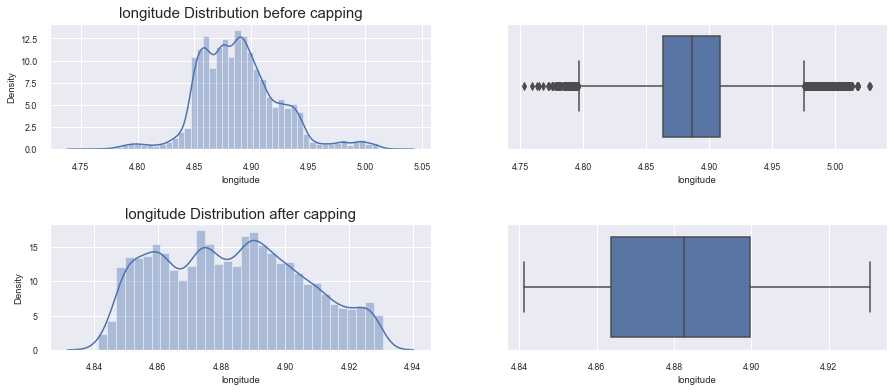

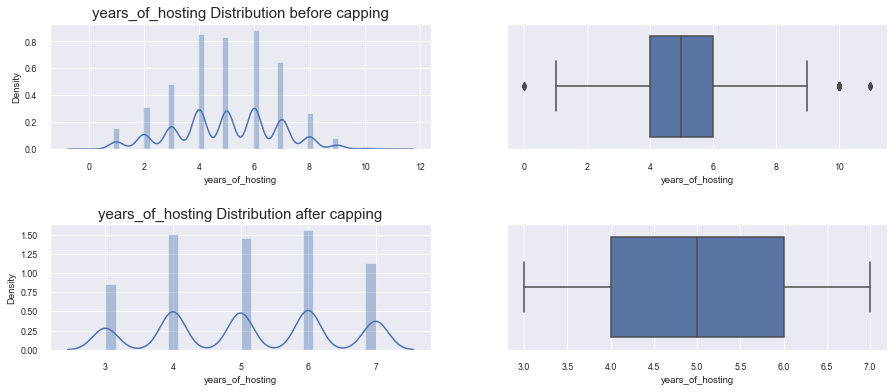

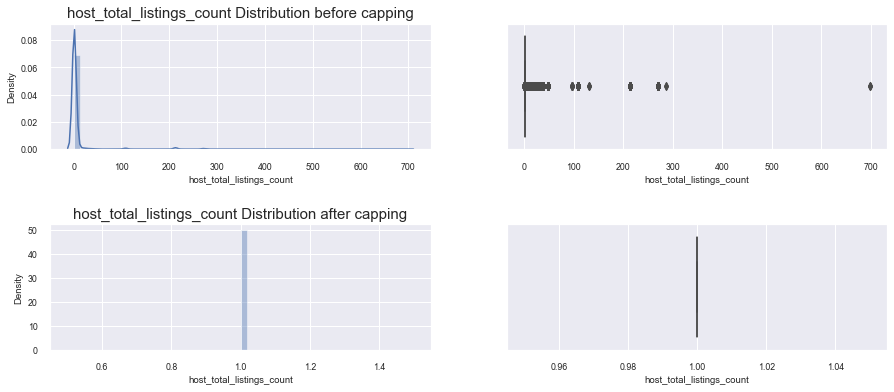

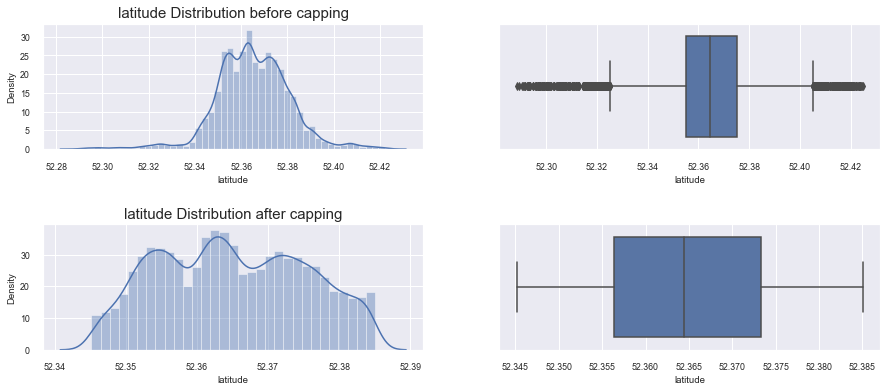

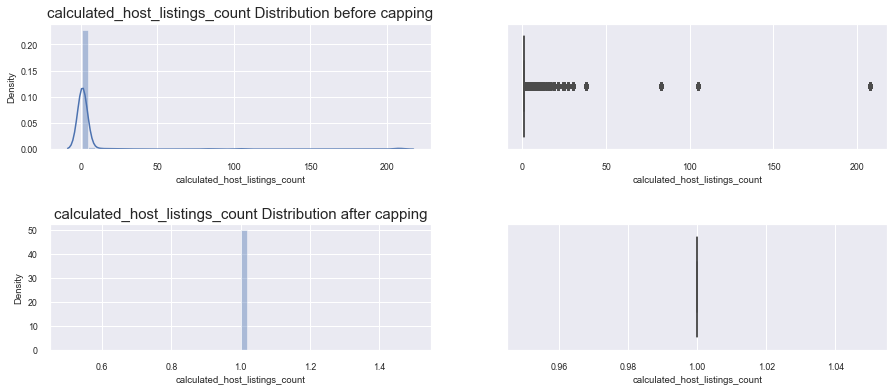

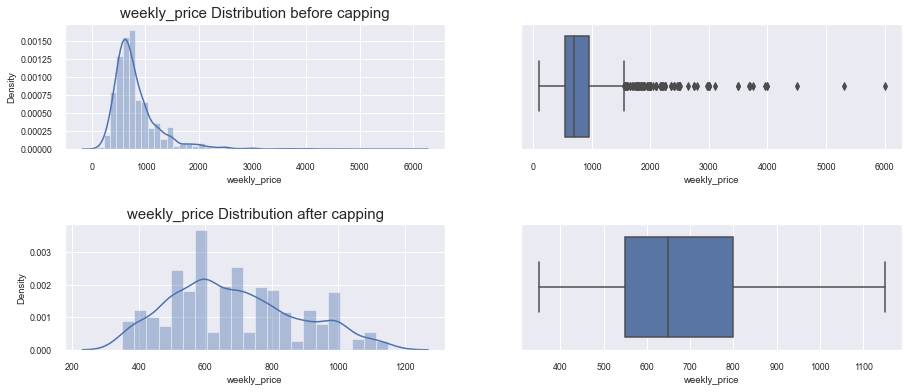

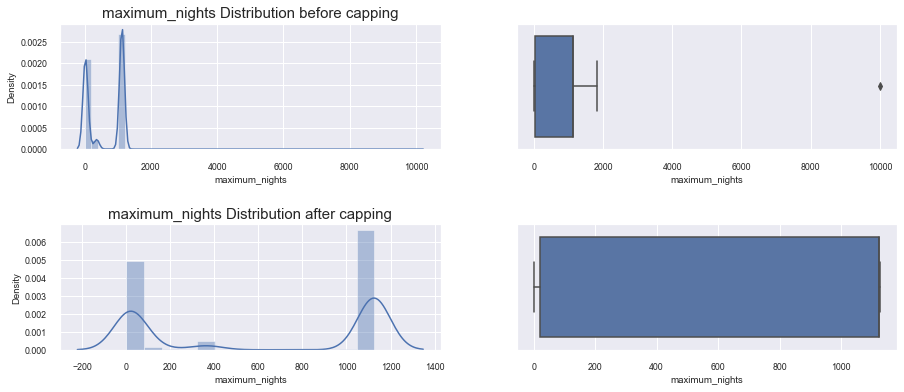

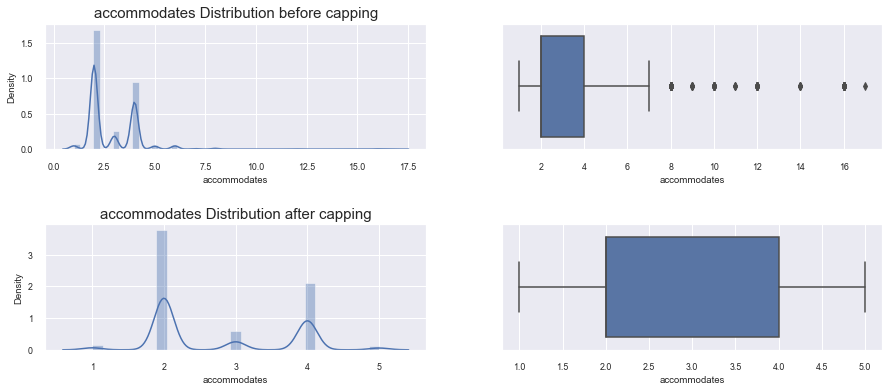

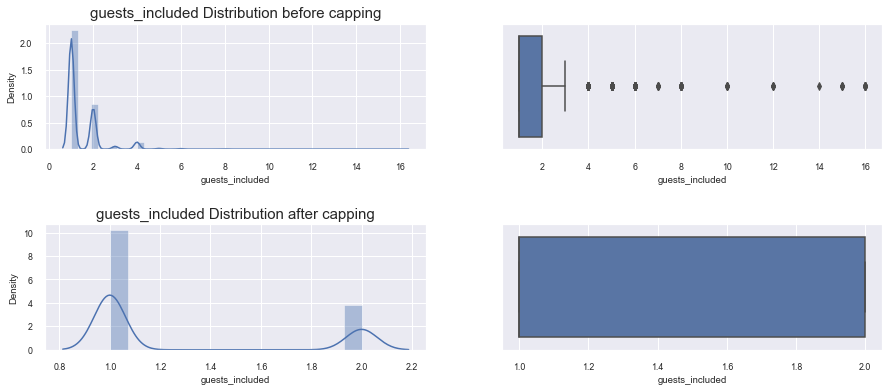

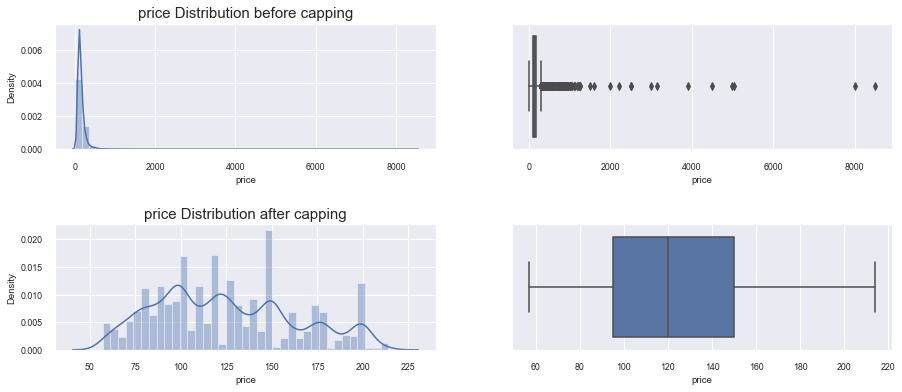

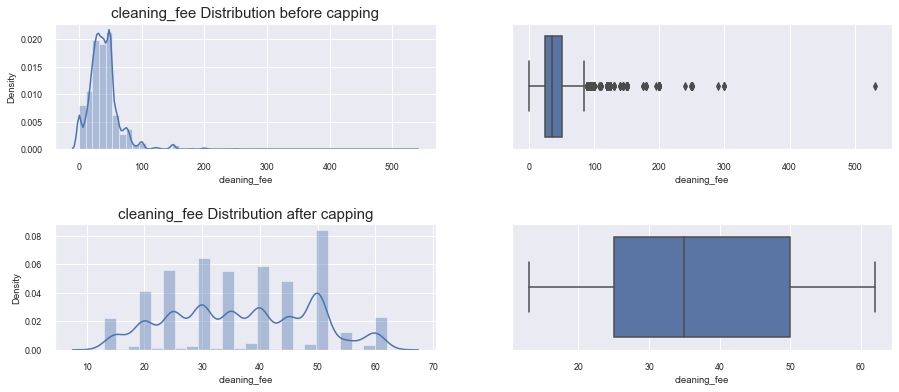

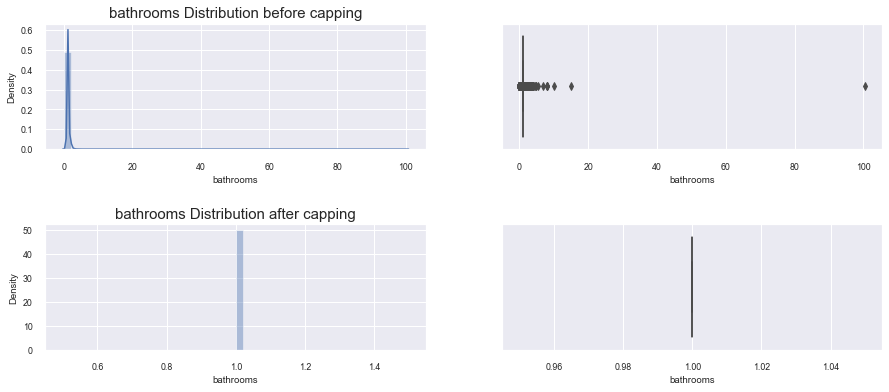

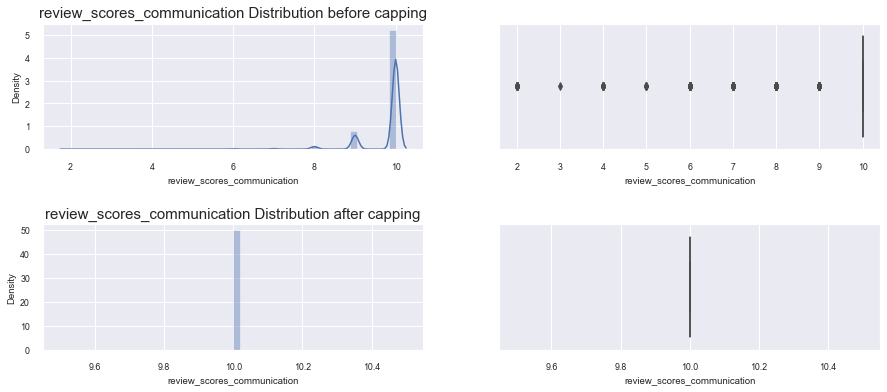

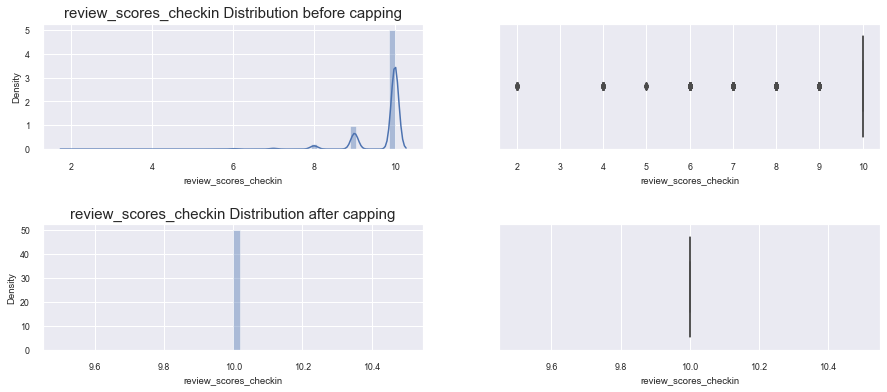

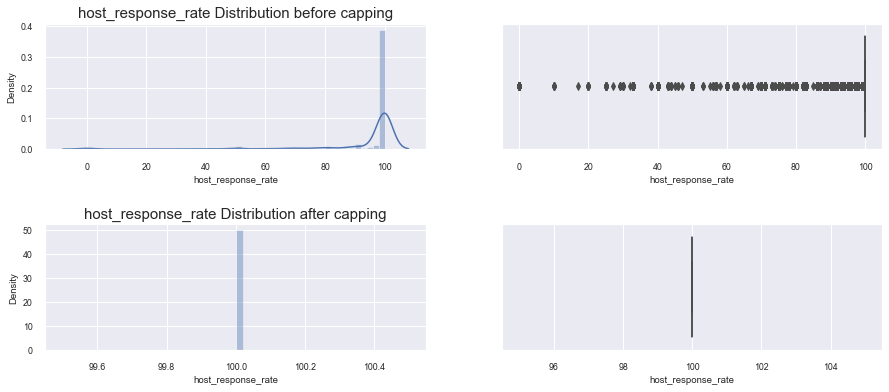

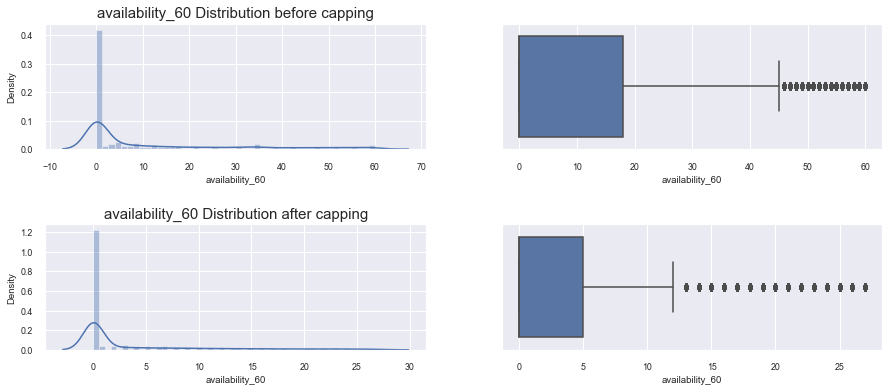

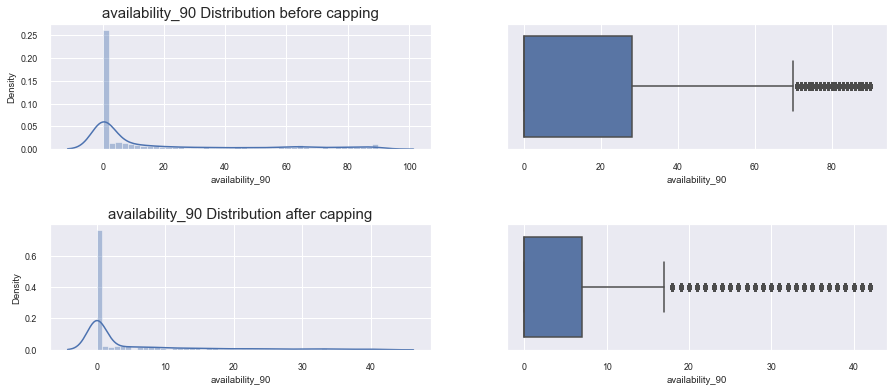

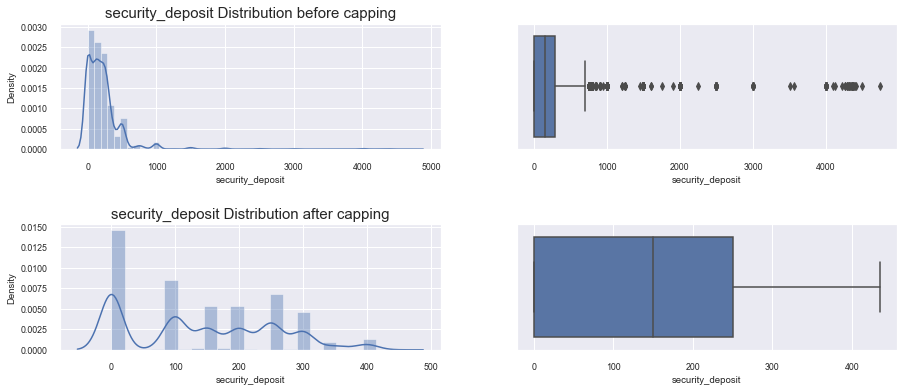

In [157]:
def dist_compare_after_capping(original_df, new, cols):
    for col in relevant_columns_features:
        if col in cols:
            plt.figure(figsize=(15,6))
            plt.subplot(2,2,1)
            sns.distplot(original_df[col])
            plt.title('{} Distribution before capping'.format(col), fontsize=15)
            plt.subplot(2,2,2)
            sns.boxplot(original_df[col])
            plt.subplots_adjust(hspace = 0.6)
            plt.subplot(2,2,3)
            sns.distplot(new[col])
            plt.title('{} Distribution after capping'.format(col), fontsize=15)
            plt.subplot(2,2,4)
            sns.boxplot(new[col])
            plt.show()
dist_compare_after_capping(df, temp, outliers_df.index)

After careful consideration, we have decided to maintain some values from the following reasons: 
Values 1-4 will leave us with 1 value only
1- host_total_listings_count
2- latitude
3- review_scores_checkin
4-review_scores_communication 
Values 5-9 affects directly on our target value
5-price 
6- guests_included
7- years_of_hosting
8- calculated_host_listings_count
9- latitude

In [216]:
remove_outliers=['bathrooms','security_deposit','cleaning_fee','availability_90',\
                                     'availability_60','host_response_rate','accommodates',\
                                    'maximum_nights','weekly_price']
remove_outliers

['bathrooms',
 'security_deposit',
 'cleaning_fee',
 'availability_90',
 'availability_60',
 'host_response_rate',
 'accommodates',
 'maximum_nights',
 'weekly_price']

Removing outleirs that don't change correlation 

In [217]:
#relevant_columns=out_df.loc[out_df['drop']=='yes']['feature']
manipulated_data= df.copy()
for j in range(len(df)):
    for col in remove_outliers:
        if df_outliers.loc[j,col] == 1:
            manipulated_data.loc[j,col] = 0

In [225]:

#Checking to see the outlier = yes on manipulated data is gone on df
#manipulated_data.loc[df['bathrooms'] == 6]
#Checking to see if a row with no outlier is saved on df 
manipulated_data.loc[df['bathrooms'] == 7]

,id,host_id,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,_'jumio',_'facebook',_'offline_government_id',_'government_id',_'selfie',_'identity_manual',_'work_email',_'google','phone',_'manual_offline'
11525,12172233,65378367,Netherlands,a few days or more,0.0,0.0,Bos en Lommer,1.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [234]:
manipulated_data.to_csv('manipulated_data_no_outleirs.csv')

# Missing Values

In [51]:
manipulated_data = pd.read_csv('manipulated_data_no_outleirs.csv')
manipulated_data.head()

,Unnamed: 0,id,host_id,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,...,_'jumio',_'facebook',_'offline_government_id',_'government_id',_'selfie',_'identity_manual',_'work_email',_'google','phone',_'manual_offline'
0,0,5957043,30922450,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,1,12279014,66160250,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,...,1,1,0,0,0,0,0,0,0,0
2,2,13824148,79317608,Netherlands,within a few hours,100.0,1.0,NaN,1.0,1.0,...,1,1,0,0,0,0,0,0,0,0
3,3,15350277,18571882,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,...,1,1,1,1,0,0,0,0,0,0
4,4,15885709,28689390,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0


Now we can treat the missing data on df

In [52]:
#manipulated_data is the original data with no outliers
manipulated_data.head()

,Unnamed: 0,id,host_id,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,...,_'jumio',_'facebook',_'offline_government_id',_'government_id',_'selfie',_'identity_manual',_'work_email',_'google','phone',_'manual_offline'
0,0,5957043,30922450,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,1,12279014,66160250,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,...,1,1,0,0,0,0,0,0,0,0
2,2,13824148,79317608,Netherlands,within a few hours,100.0,1.0,NaN,1.0,1.0,...,1,1,0,0,0,0,0,0,0,0
3,3,15350277,18571882,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,...,1,1,1,1,0,0,0,0,0,0
4,4,15885709,28689390,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0


### Missing Values

In [53]:
#Getting a new/updated missing dataset from 'manipulated data' - this time we will call it df_nulls
df_nulls = manipulated_data.copy()
for col in df_nulls:
    if df_nulls[col].isna().sum() == 0:
        del df_nulls[col]
df_nulls

,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,host_identity_verified,bathrooms,bedrooms,...,security_deposit,cleaning_fee,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,1.0,1.0,1.0,...,300.0,NaN,80.0,9.0,9.0,9.0,9.0,8.0,9.0,0.14
1,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,1.0,1.0,1.0,...,NaN,25.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.13
2,Netherlands,within a few hours,100.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,...,NaN,50.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.78
3,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,0.0,1.0,3.0,...,NaN,40.0,100.0,8.0,8.0,10.0,10.0,10.0,8.0,0.04
4,Netherlands,NaN,NaN,0.0,NaN,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,80.0,8.0,10.0,8.0,10.0,6.0,8.0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,NaN,within a few hours,100.0,0.0,Hoofddorppleinbuurt,1.0,1.0,0.0,1.0,3.0,...,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20026,NaN,within an hour,100.0,0.0,Frederik Hendrikbuurt,1.0,1.0,0.0,1.0,0.0,...,NaN,NaN,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.00
20027,NaN,NaN,NaN,0.0,NaN,1.0,1.0,0.0,1.0,1.0,...,0.0,30.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.80
20028,NaN,NaN,NaN,0.0,Oud-West,1.0,1.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


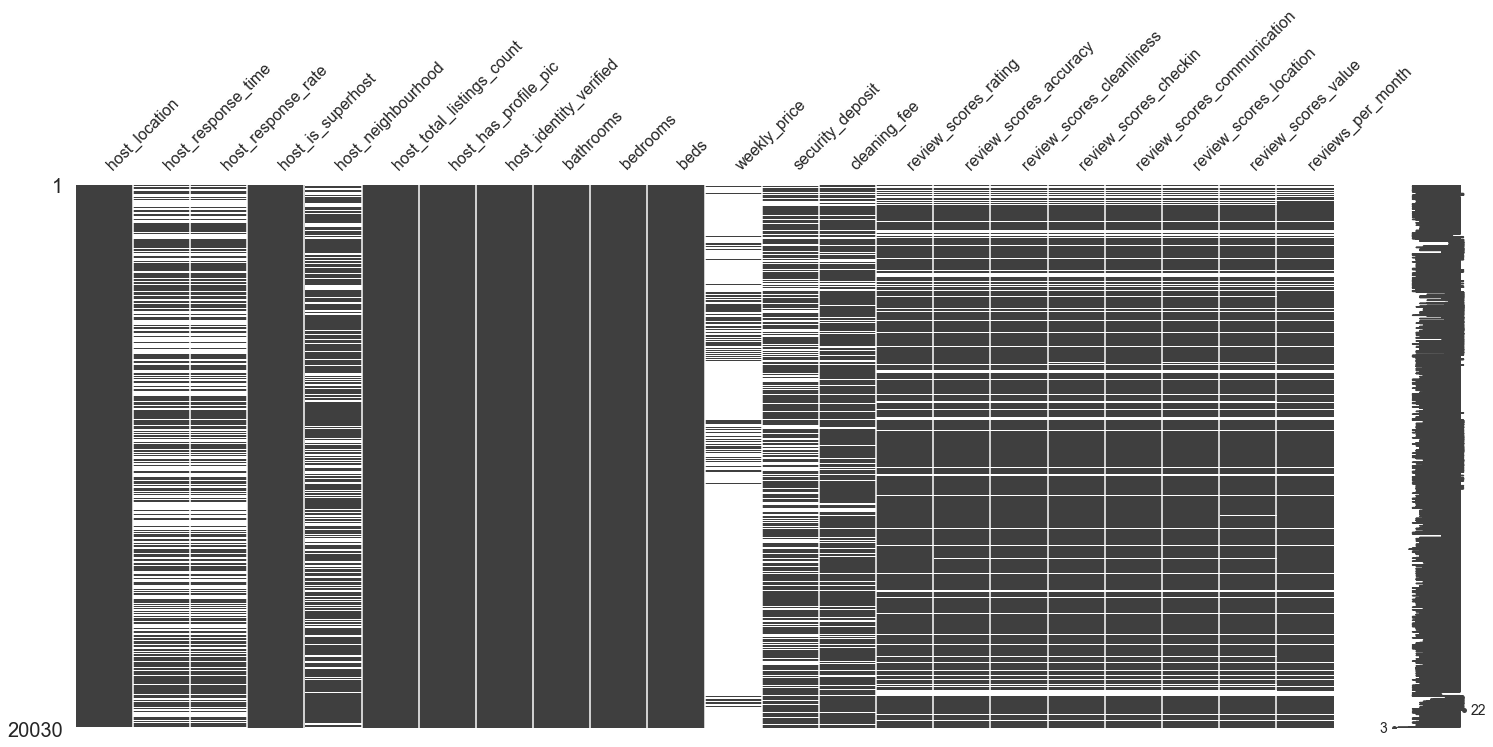

In [342]:
msno.matrix(df_nulls);

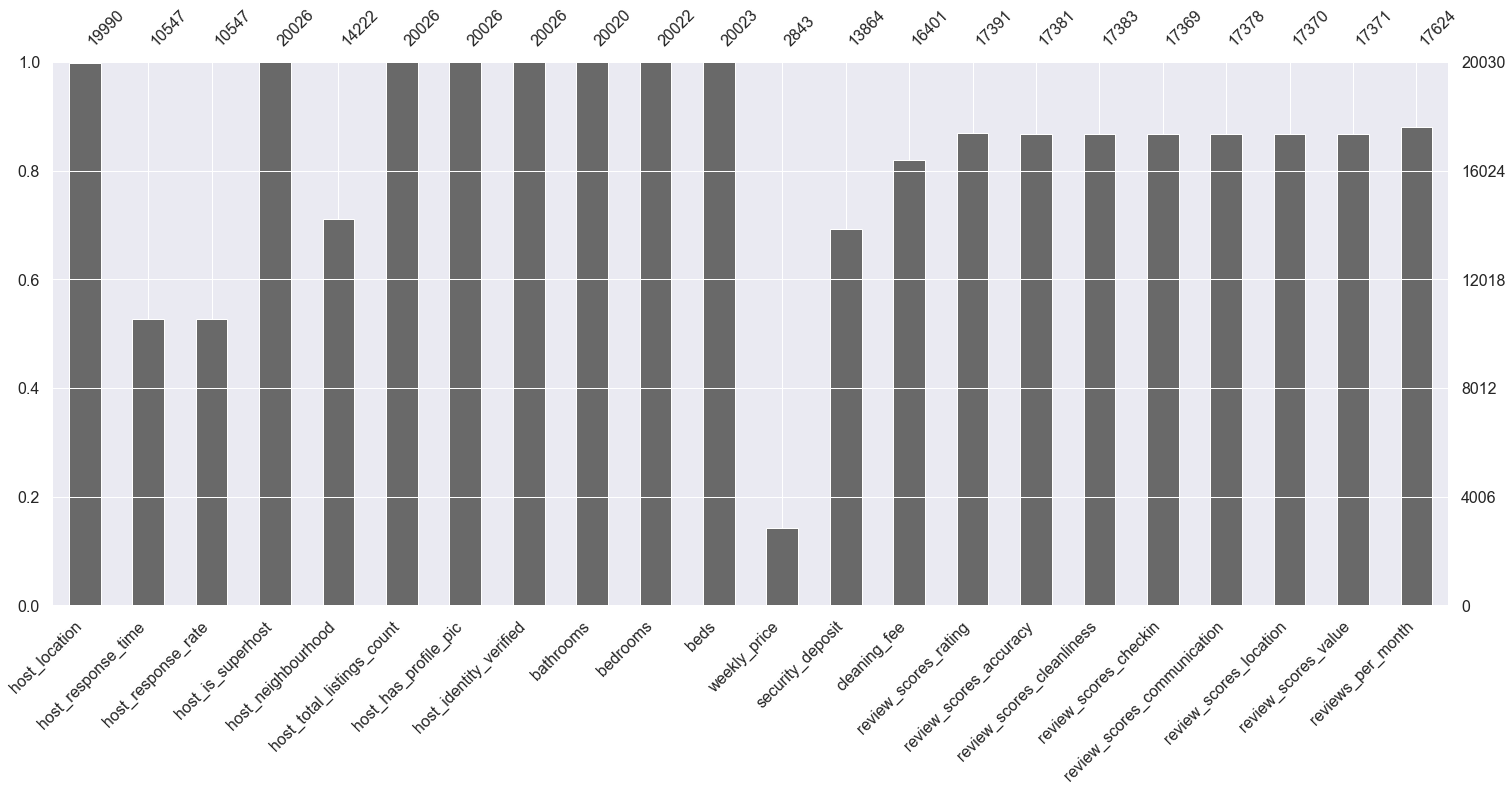

In [343]:
msno.bar(df_nulls);

Updated missing values count and frequency after outliers removal:

In [54]:
mis_val = df_nulls.isna().sum()
mis_val_per = df_nulls.isna().sum()/len(df_nulls)*100
mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,:] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

,Missing Values,% of Total Values
weekly_price,17187,85.8
host_response_rate,9483,47.3
host_response_time,9483,47.3
security_deposit,6166,30.8
host_neighbourhood,5808,29.0
cleaning_fee,3629,18.1
review_scores_checkin,2661,13.3
review_scores_location,2660,13.3
review_scores_value,2659,13.3
review_scores_communication,2652,13.2


In [55]:
mis_val_table_ren_columns.sum()

Missing Values       72810.0
% of Total Values      363.2
dtype: float64

Creating a dataframe with missing values as 1 and existing values as 0:

In [56]:
df_missing_data = manipulated_data.isin([np.nan]) 
df_missing_data = df_missing_data.astype('int')
df_missing_data

,Unnamed: 0,id,host_id,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,...,_'jumio',_'facebook',_'offline_government_id',_'government_id',_'selfie',_'identity_manual',_'work_email',_'google','phone',_'manual_offline'
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20026,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20027,0,0,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20028,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Creating df including numeric features of the later data - manipulated_data

In [57]:
#Selecting numeric data
numeric_manipulated_data = manipulated_data.select_dtypes(include=[np.number])
numeric_manipulated_data.columns

Index(['Unnamed: 0', 'id', 'host_id', 'host_response_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'latitude',
       'longitude',
       ...
       '_'jumio'', '_'facebook'', '_'offline_government_id'',
       '_'government_id'', '_'selfie'', '_'identity_manual'', '_'work_email'',
       '_'google'', ''phone'', '_'manual_offline''],
      dtype='object', length=150)

Difference in the distribution of a variable when another variable is with or without MV:

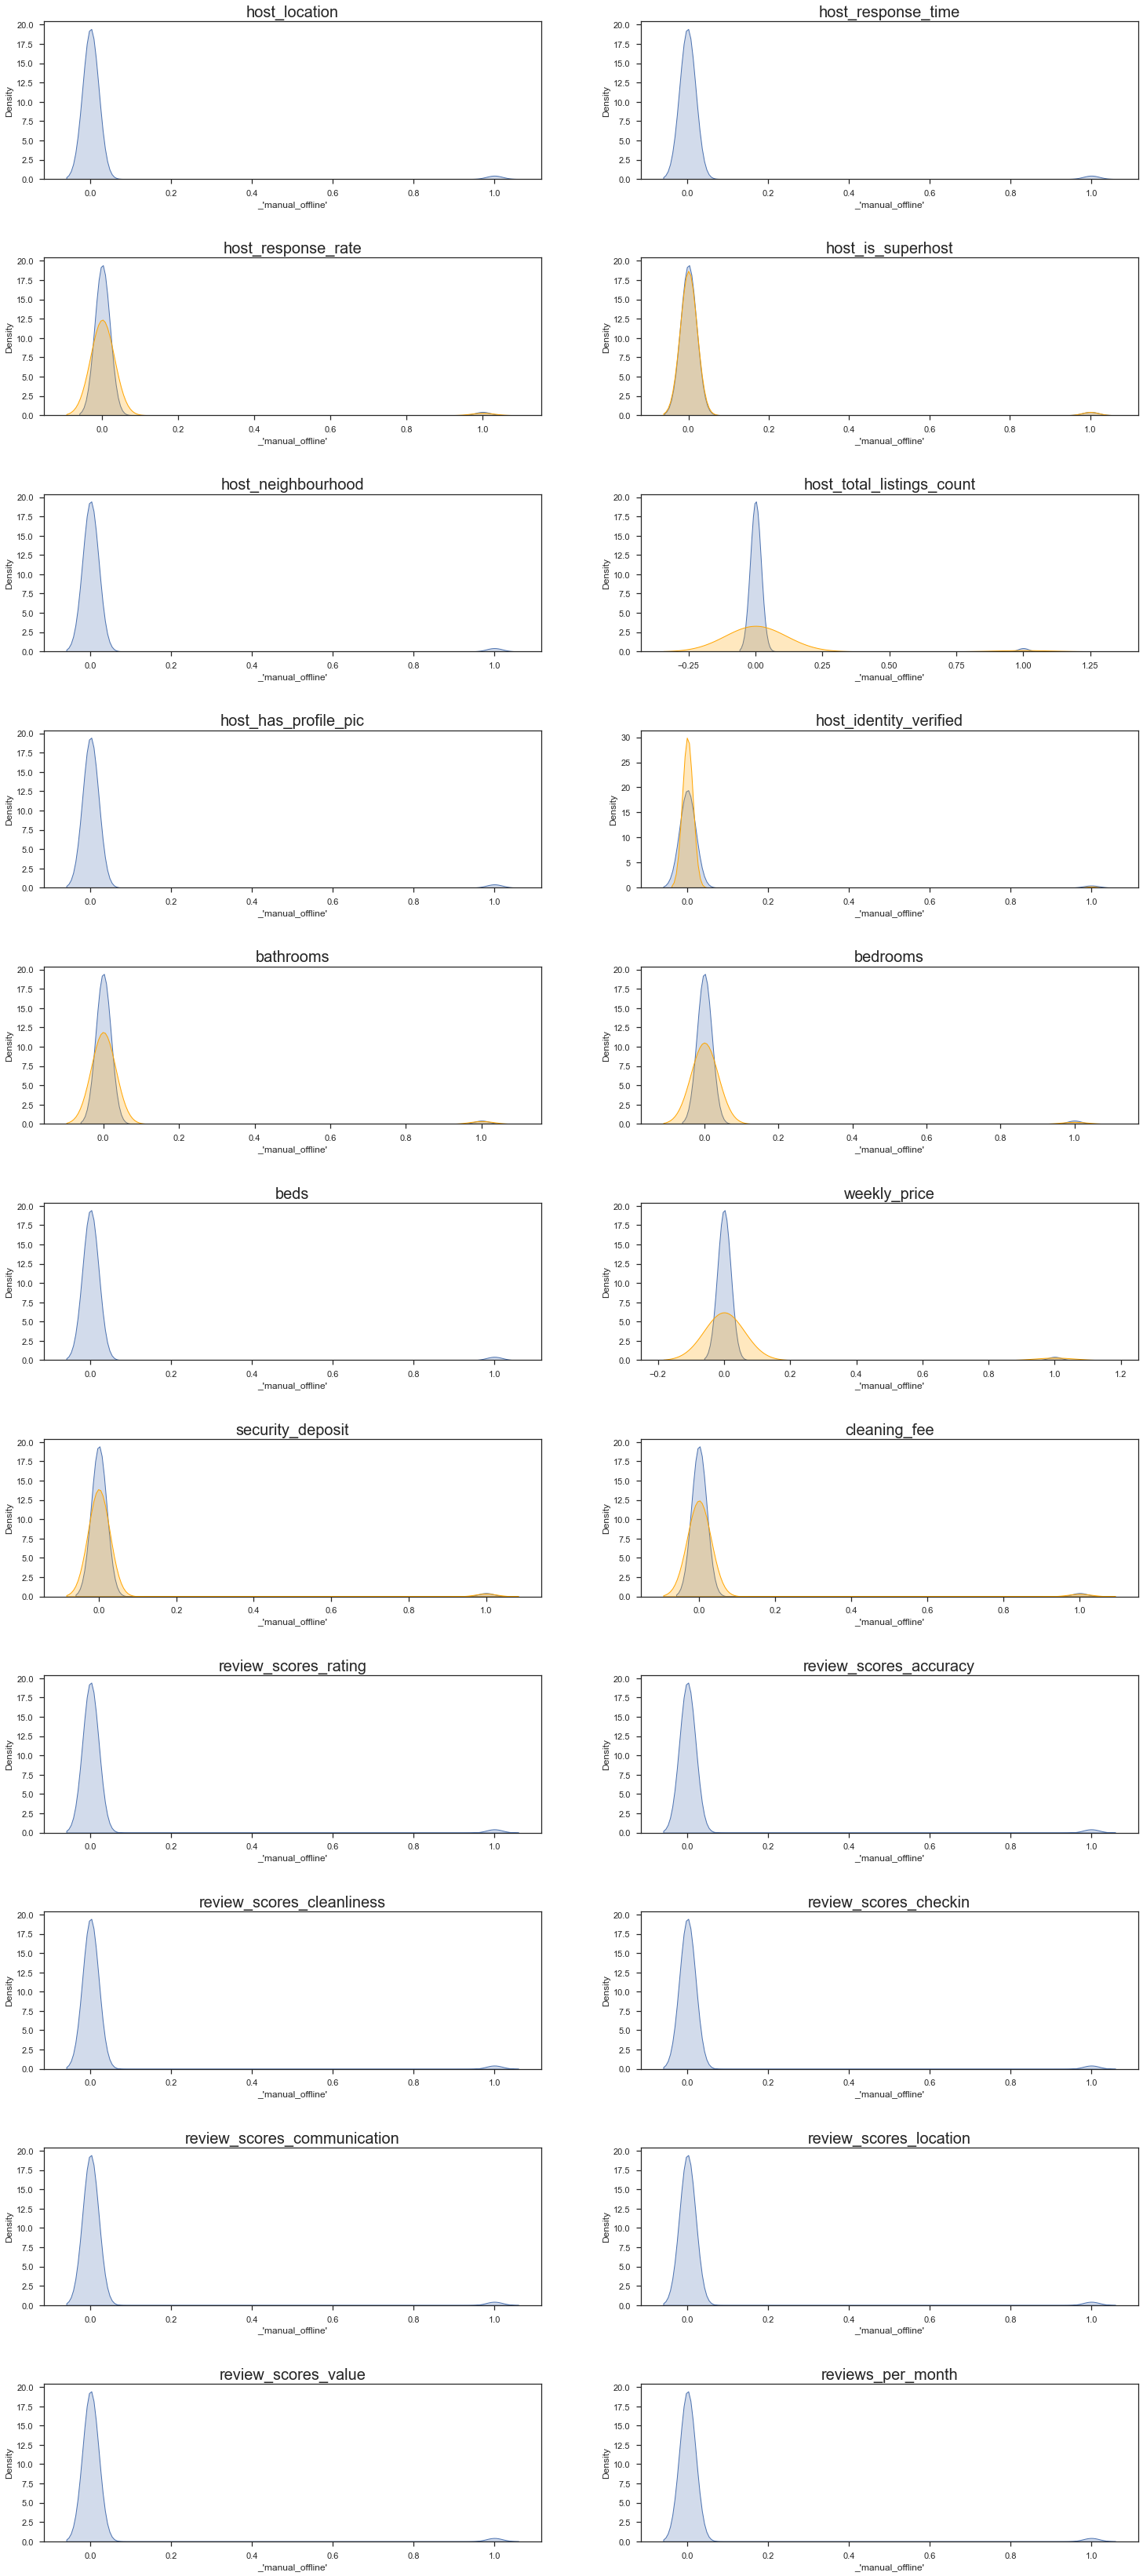

In [348]:
#c = numeric_manipulated_data.columns
colist = df_nulls.columns
#names = missing_names
#sns.set(font_scale = 0.8)
#sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set
a=len(colist)
b=2
c=1
fig = plt.figure(figsize=(25,120))
plt.subplots_adjust(hspace=0.5)
for j in df_nulls:
        if j!=i :
            plt.subplot(a,b,c)
            plt.title('{}'.format(j),fontsize=20)
            plt.xlabel(i)
            sns.kdeplot(df[i],fill=True)
            sns.kdeplot(df[i].loc[df_nulls[j]==0],fill=True,color='orange')
        c=c+1
        
plt.show()

Exploring data the segnificunce of distribution change:

In [58]:
#le = preprocessing.LabelEncoder()
MV_df_final = pd.DataFrame(columns= ['Var', 'MV_pct', 'distribution_changed'])
#df[m] = le.fit_transform(df[m].astype(str))
m=numeric_manipulated_data.copy()
#m = manipulated_data._get_numeric_data().columns.dropna().unique()
np.seterr(divide='ignore', invalid='ignore')
for i in m: 
    # and i in mis_val_table_ren_columns.index.tolist():
    # column with NULLS
        null = m[i]
    # column without NULLS
        non = m[i].loc[df_missing_data[i]==0]
    # target value with NULLS
        superhost_null = m['host_is_superhost']
    # target value without NULLS
        superhost_non = superhost_null.loc[df_missing_data[i]==0]
        mv = df_missing_data[i].sum()
    # perform Kolmogorov-Smirnov test
        pval = ks_2samp(null, non)[1]
        dis_change = np.where(pval<0.5,'+','-')
        MV_df_final = MV_df_final.append({'Var': i, 'MV_pct': mv, 'distribution_changed': dis_change},ignore_index=True)
MV_df_final

,Var,MV_pct,distribution_changed
0,Unnamed: 0,0,-
1,id,0,-
2,host_id,0,-
3,host_response_rate,9483,+
4,host_is_superhost,4,-
...,...,...,...
145,_'identity_manual',0,-
146,_'work_email',0,-
147,_'google',0,-
148,'phone',0,-


<AxesSubplot:>

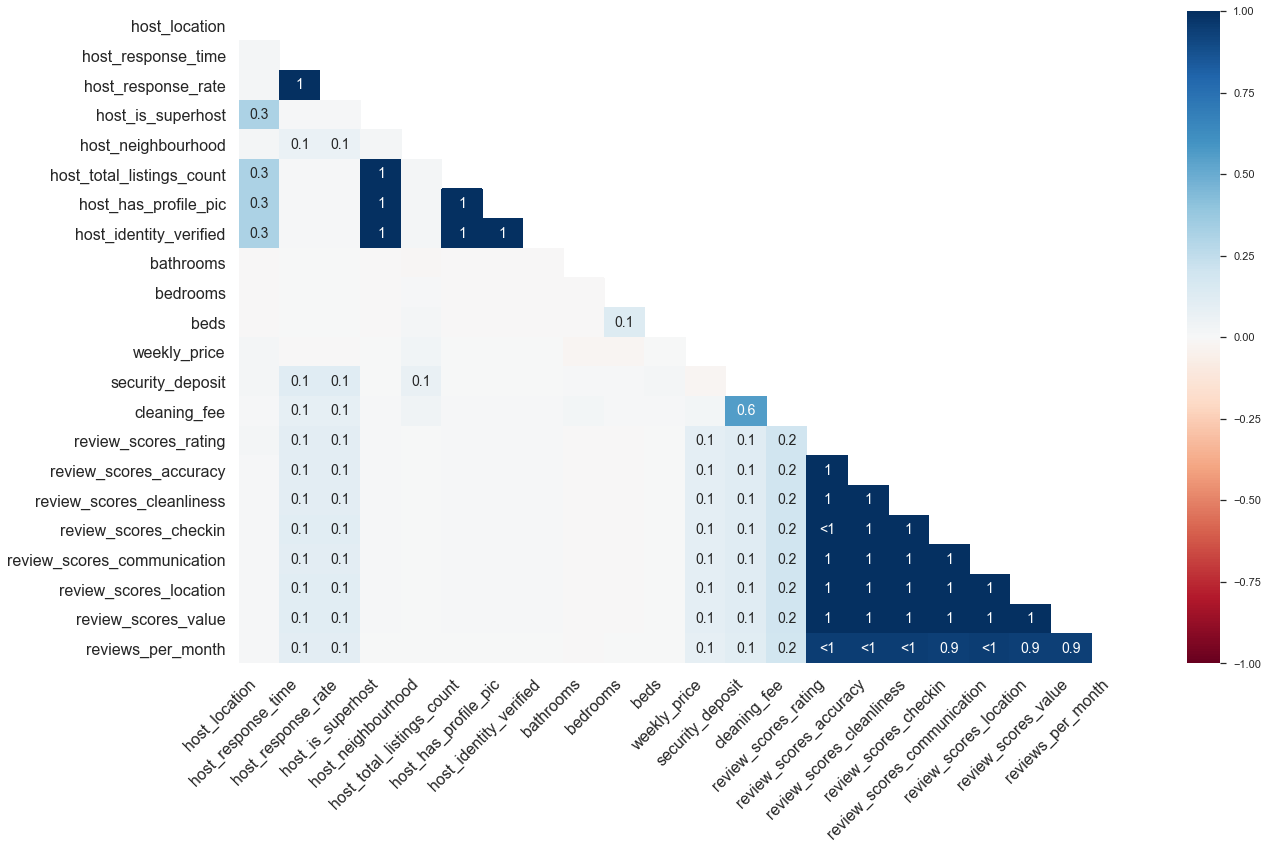

In [350]:
msno.heatmap(manipulated_data)

In [59]:
MV_df_final['drop']= 'Yes'
MV_df_final['MV_type']= 'MCAR/MAR'
MV_df_final.loc[(MV_df_final.distribution_changed== '+'),'drop']='No'
MV_df_final.loc[(MV_df_final.distribution_changed== '+'),'MV_type']='MNAR'
MV_df_final = MV_df_final[MV_df_final['MV_pct']>0].sort_values(by='MV_pct', ascending=False)
MV_df_final

,Var,MV_pct,distribution_changed,drop,MV_type
16,weekly_price,17187,+,No,MNAR
3,host_response_rate,9483,+,No,MNAR
17,security_deposit,6166,+,No,MNAR
18,cleaning_fee,3629,+,No,MNAR
31,review_scores_checkin,2661,+,No,MNAR
33,review_scores_location,2660,+,No,MNAR
34,review_scores_value,2659,+,No,MNAR
32,review_scores_communication,2652,+,No,MNAR
29,review_scores_accuracy,2649,+,No,MNAR
30,review_scores_cleanliness,2647,+,No,MNAR


# Data Imputation

Altought the columns that are recomended for removal are marked with '+' in the "distribution chage" in the prevous table. 
We will create different solutions to difference data. Total of 22 columns to treat

In [60]:
df_final=manipulated_data

In [61]:
df_nulls.columns

Index(['host_location', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'bathrooms',
       'bedrooms', 'beds', 'weekly_price', 'security_deposit', 'cleaning_fee',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

1. Weekly Price - we will take the avarage ratio of weekly price/daily price and will multiple the price with the ratio to recieve estimated weekly price. The missing values are 85% - so it is unlikely to impute

In [62]:
#collectin the mean of price & weekly price
price_mean=df_final['price'].astype(float).mean()
price_weekly_mean=df_final['weekly_price'].astype(float).mean()
#Ratio
ratio=price_weekly_mean/price_mean
ratio

3.6841465048624036

In [63]:
df_final['weekly_price'] = df_final.apply(lambda row: row.price*ratio if type(row.weekly_price) != int else row.weekly_price, axis=1)
df_final['weekly_price'].isnull().sum()

0

2. We will delete host_response_rate since the missing rate is nearle 50% and we can use the host_response_time

In [64]:
del df_final['host_response_rate']

3. We will categorize the missing values of dummies and categorial values: host_has_profile_pic, host_identity_verified, host_is_superhost, host_response_time, host_neighbourhood, host_location. 

3.1 Transporing missing values of 3 categorial columns into additional categoey 'Missing'

In [65]:
#host_response_time
df_final['host_response_time'] = df_final.apply(
            lambda row: row.host_response_time if type(row.host_response_time) == str else 'missing', axis=1)
df_final['host_response_time'].isnull().sum()

0

In [66]:
#host_neighbourhood
df_final['host_neighbourhood'] = df_final.apply(
            lambda row: row.host_neighbourhood if type(row.host_neighbourhood) == str else 'missing', axis=1)
df_final['host_neighbourhood'].isnull().sum()

0

In [67]:
#host_location
df_final['host_location'] = df_final.apply(
            lambda row: row.host_location if type(row.host_location) == str else 'missing', axis=1)
df_final['host_location'].isnull().sum()

0

3.2 Dummy Values 

In [68]:
#host_identity_verified will be place with 0. only 4 missing values and we can say that if we don't know, 
#than it is not verified
df_final['host_identity_verified'].fillna("0", inplace = True)
df_final['host_identity_verified'].value_counts()

0.0    11755
1.0     8271
2          4
Name: host_identity_verified, dtype: int64

In [69]:
df_final['host_identity_verified'].isnull().sum()

0

In [71]:
#host_has_profile_pic
#Same as above - if we don't have an approval for missing pic than we can say it is "0" (only 4 missing)
df_final['host_has_profile_pic'].fillna("0", inplace = True)
df_final['host_has_profile_pic'].value_counts()

1.0    20005
0.0       21
2          4
Name: host_has_profile_pic, dtype: int64

In [72]:
#host_is_superhost
#Also we will take the the 4 missing values that has transformed to to value '0'. 
#A third parameter will be distracting and we will not anlyse it as a superhost anyway.
df_final['host_is_superhost'].fillna("0", inplace = True)
df_final['host_is_superhost'].value_counts()

0.0    16856
1.0     3170
2          4
Name: host_is_superhost, dtype: int64

In [73]:
#Duble check of the the dataframe manually
df_final.to_csv('temp_missing.csv')

The rest of the data is below 40% missing. hense we can imput. we will use KNN

In [74]:
#list: 'bathrooms', 'bedrooms', 'beds', 'host_total_listings_count', 'security_deposit','review_scores_checkin',
# 'review_scores_location',  'review_scores_value', 'review_scores_communication', 'review_scores_accuracy',
# 'review_scores_cleanliness', 'review_scores_rating', 'reviews_per_month', 'cleaning_fee'

In [75]:
#sns.heatmap(df_nulls) 

In [76]:
from sklearn.impute import KNNImputer
final_df = df_final.copy()
imp_cols = final_df.select_dtypes(include = ['float64', 'int64']).columns
knn_imputer = KNNImputer(n_neighbors=1)
imputed_data = pd.DataFrame(knn_imputer.fit_transform(final_df[imp_cols]),columns = imp_cols)

In [77]:
final_df[imp_cols] = imputed_data

<AxesSubplot:>

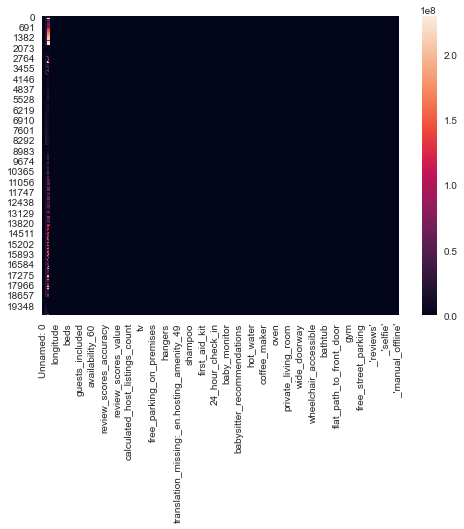

In [78]:
sns.heatmap(imputed_data) 

In [79]:
final_df.isnull().sum().sum()

0

Saving the imputed data:

In [80]:
final_df.to_csv('stage3_airbnb_amsterdam.csv')

# Next to stage 3...Aggregation and Feature Engineering 